In [1]:
!pip install torch-geometric

# !unzip "/content/Archive.zip"
# !rm -rf '/content/prepared_samples'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00


In [2]:
#create samples :
import os
import torch
import pickle
import pandas as pd

def load_graph(path, is_pickle=True):
    """
    Load a molecule graph (.pkl) or a protein graph (.pt).
    If is_pickle is True, use pickle to load the file; otherwise, use torch.load.
    """
    if is_pickle:
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        return torch.load(path)

def prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir):
    """
    Incrementally prepares the dataset and saves each (molecule, protein, target) tuple as a separate .pt file.

    Args:
    - filtered_dataset: The filtered KIBA dataset (DataFrame).
    - molecule_graph_dir: Directory where molecule graphs are stored.
    - protein_graph_dir: Directory where protein graphs are stored.
    - output_dir: Directory to save the prepared dataset incrementally.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for index, row in filtered_dataset.iterrows():
        protein_id = row['Target_ID']
        chembl_id = row['Drug_ID']

        # Load the protein graph (.pt)
        pro_graph_path = os.path.join(protein_graph_dir, f"{protein_id}_graph.pt")
        if not os.path.exists(pro_graph_path):
            print(f"Protein graph not found: {protein_id}")
            continue
        pro_graph = load_graph(pro_graph_path, is_pickle=False)

        # Load the molecule graph (.pkl)
        mol_graph_path = os.path.join(molecule_graph_dir, f"{chembl_id}_graph.pkl")
        if not os.path.exists(mol_graph_path):
            print(f"Molecule graph not found: {chembl_id}")
            continue
        mol_graph = load_graph(mol_graph_path)

        # Load target (affinity value)
        target = torch.tensor([row['Y']], dtype=torch.float)

        # Create the sample as a tuple (molecule graph, protein graph, target)
        sample = (mol_graph, pro_graph, target)

        # Save the sample as a .pt file
        sample_path = os.path.join(output_dir, f"sample_{index}.pt")
        torch.save(sample, sample_path)

        if(index%4000 == 0 ):
            print(f"Saved sample {index} as {sample_path}")




# Example usage for individual saving
molecule_graph_dir = '/kaggle/input/graphs/molecule_graphs'  # Directory where molecule graphs are stored
protein_graph_dir = '/kaggle/input/graphs/ProteinGraphs'  # Directory where protein graphs are stored
filtered_dataset_path = '/kaggle/input/graphs/filtered_DavisDataSet.csv'  # Path to the filtered dataset CSV
output_dir = 'prepared_samples/'  # Directory to save individual samples

# Load filtered dataset CSV
filtered_dataset = pd.read_csv(filtered_dataset_path)

# Prepare the dataset incrementally, saving each sample as a .pt file
prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir)

print("Dataset preparation completed.")

<ipython-input-2-978404414efb>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 0 as prepared_samples/sample_0.pt


<ipython-input-2-978404414efb>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 4000 as prepared_samples/sample_4000.pt
Saved sample 8000 as prepared_samples/sample_8000.pt
Saved sample 12000 as prepared_samples/sample_12000.pt
Saved sample 16000 as prepared_samples/sample_16000.pt
Dataset preparation completed.


Running on cuda.
Checkpoints will be saved to: /kaggle/working/TrainingModelMul
Starting fresh metrics tracking.
GNNNet Loaded
No existing checkpoint found; starting fresh.


Training:   0%|          | 0/250 [00:36<?, ?epoch/s]

[Epoch 1/250] Training Loss: 7.5488


Training:   0%|          | 1/250 [01:13<5:06:56, 73.96s/epoch]

  Train => MSE=0.9398, CI=0.4310, Pearson=-0.1010
  Test  => MSE=0.9794, CI=0.4334, Pearson=-0.1033
Checkpoint saved at epoch 1


Training:   0%|          | 1/250 [01:46<5:06:56, 73.96s/epoch]

[Epoch 2/250] Training Loss: 0.9230


Training:   1%|          | 2/250 [02:21<4:51:15, 70.47s/epoch]

  Train => MSE=0.7649, CI=0.4677, Pearson=-0.0349
  Test  => MSE=0.8249, CI=0.4718, Pearson=-0.0361
Checkpoint saved at epoch 2
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch1.pt


Training:   1%|          | 2/250 [02:54<4:51:15, 70.47s/epoch]

[Epoch 3/250] Training Loss: 0.8171


Training:   1%|          | 3/250 [03:28<4:42:59, 68.74s/epoch]

  Train => MSE=0.7275, CI=0.6170, Pearson=0.2221
  Test  => MSE=0.7844, CI=0.6153, Pearson=0.2135
Checkpoint saved at epoch 3
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch2.pt


Training:   1%|          | 3/250 [04:01<4:42:59, 68.74s/epoch]

[Epoch 4/250] Training Loss: 0.7859


Training:   2%|▏         | 4/250 [04:36<4:40:02, 68.30s/epoch]

  Train => MSE=0.7042, CI=0.6540, Pearson=0.2734
  Test  => MSE=0.7616, CI=0.6531, Pearson=0.2624
Checkpoint saved at epoch 4
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch3.pt


Training:   2%|▏         | 4/250 [05:08<4:40:02, 68.30s/epoch]

[Epoch 5/250] Training Loss: 0.7619


Training:   2%|▏         | 5/250 [05:42<4:35:26, 67.45s/epoch]

  Train => MSE=0.6740, CI=0.6602, Pearson=0.3058
  Test  => MSE=0.7304, CI=0.6605, Pearson=0.2918
Checkpoint saved at epoch 5
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch4.pt


Training:   2%|▏         | 5/250 [06:14<4:35:26, 67.45s/epoch]

[Epoch 6/250] Training Loss: 0.7332


Training:   2%|▏         | 6/250 [06:49<4:33:45, 67.32s/epoch]

  Train => MSE=0.6508, CI=0.6738, Pearson=0.3454
  Test  => MSE=0.7053, CI=0.6762, Pearson=0.3335
Checkpoint saved at epoch 6
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch5.pt


Training:   2%|▏         | 6/250 [07:21<4:33:45, 67.32s/epoch]

[Epoch 7/250] Training Loss: 0.7147


Training:   3%|▎         | 7/250 [07:55<4:31:39, 67.08s/epoch]

  Train => MSE=0.6295, CI=0.6914, Pearson=0.3851
  Test  => MSE=0.6815, CI=0.6961, Pearson=0.3765
Checkpoint saved at epoch 7
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch6.pt


Training:   3%|▎         | 7/250 [08:28<4:31:39, 67.08s/epoch]

[Epoch 8/250] Training Loss: 0.6884


Training:   3%|▎         | 8/250 [09:03<4:31:02, 67.20s/epoch]

  Train => MSE=0.6123, CI=0.7083, Pearson=0.4214
  Test  => MSE=0.6669, CI=0.7150, Pearson=0.4127
Checkpoint saved at epoch 8
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch7.pt


Training:   3%|▎         | 8/250 [09:35<4:31:02, 67.20s/epoch]

[Epoch 9/250] Training Loss: 0.6648


Training:   4%|▎         | 9/250 [10:10<4:29:20, 67.06s/epoch]

  Train => MSE=0.5905, CI=0.7249, Pearson=0.4555
  Test  => MSE=0.6446, CI=0.7318, Pearson=0.4450
Checkpoint saved at epoch 9
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch8.pt


Training:   4%|▎         | 9/250 [10:42<4:29:20, 67.06s/epoch]

[Epoch 10/250] Training Loss: 0.6526


Training:   4%|▍         | 10/250 [11:17<4:28:28, 67.12s/epoch]

  Train => MSE=0.5719, CI=0.7348, Pearson=0.4744
  Test  => MSE=0.6217, CI=0.7406, Pearson=0.4631
Checkpoint saved at epoch 10
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch9.pt


Training:   4%|▍         | 10/250 [11:50<4:28:28, 67.12s/epoch]

[Epoch 11/250] Training Loss: 0.6345


Training:   4%|▍         | 11/250 [12:25<4:28:56, 67.52s/epoch]

  Train => MSE=0.5665, CI=0.7418, Pearson=0.4871
  Test  => MSE=0.6181, CI=0.7467, Pearson=0.4764
Checkpoint saved at epoch 11
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch10.pt


Training:   4%|▍         | 11/250 [12:57<4:28:56, 67.52s/epoch]

[Epoch 12/250] Training Loss: 0.6257


Training:   5%|▍         | 12/250 [13:31<4:25:41, 66.98s/epoch]

  Train => MSE=0.5569, CI=0.7463, Pearson=0.4939
  Test  => MSE=0.6073, CI=0.7504, Pearson=0.4800
Checkpoint saved at epoch 12
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch11.pt


Training:   5%|▍         | 12/250 [14:04<4:25:41, 66.98s/epoch]

[Epoch 13/250] Training Loss: 0.6243


Training:   5%|▌         | 13/250 [14:39<4:25:57, 67.33s/epoch]

  Train => MSE=0.5701, CI=0.7505, Pearson=0.5028
  Test  => MSE=0.6151, CI=0.7544, Pearson=0.4886
Checkpoint saved at epoch 13
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch12.pt


Training:   5%|▌         | 13/250 [15:11<4:25:57, 67.33s/epoch]

[Epoch 14/250] Training Loss: 0.6091


Training:   6%|▌         | 14/250 [15:46<4:24:02, 67.13s/epoch]

  Train => MSE=0.5649, CI=0.7542, Pearson=0.5106
  Test  => MSE=0.6108, CI=0.7578, Pearson=0.4949
Checkpoint saved at epoch 14
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch13.pt


Training:   6%|▌         | 14/250 [16:18<4:24:02, 67.13s/epoch]

[Epoch 15/250] Training Loss: 0.6069


Training:   6%|▌         | 14/250 [16:53<4:24:02, 67.13s/epoch]

  Train => MSE=0.5384, CI=0.7566, Pearson=0.5178
  Test  => MSE=0.5922, CI=0.7596, Pearson=0.4993


Training:   6%|▌         | 15/250 [16:54<4:23:38, 67.31s/epoch]

Checkpoint saved at epoch 15
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch14.pt


Training:   6%|▌         | 15/250 [17:25<4:23:38, 67.31s/epoch]

[Epoch 16/250] Training Loss: 0.5936


Training:   6%|▋         | 16/250 [18:01<4:22:20, 67.27s/epoch]

  Train => MSE=0.6437, CI=0.7586, Pearson=0.5222
  Test  => MSE=0.6848, CI=0.7617, Pearson=0.5023
Checkpoint saved at epoch 16
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch15.pt


Training:   6%|▋         | 16/250 [18:33<4:22:20, 67.27s/epoch]

[Epoch 17/250] Training Loss: 0.6245


Training:   7%|▋         | 17/250 [19:08<4:21:47, 67.41s/epoch]

  Train => MSE=0.5314, CI=0.7595, Pearson=0.5279
  Test  => MSE=0.5875, CI=0.7632, Pearson=0.5073
Checkpoint saved at epoch 17
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch16.pt


Training:   7%|▋         | 17/250 [19:40<4:21:47, 67.41s/epoch]

[Epoch 18/250] Training Loss: 0.5910


Training:   7%|▋         | 18/250 [20:15<4:19:09, 67.02s/epoch]

  Train => MSE=0.5245, CI=0.7625, Pearson=0.5382
  Test  => MSE=0.5823, CI=0.7651, Pearson=0.5130
Checkpoint saved at epoch 18
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch17.pt


Training:   7%|▋         | 18/250 [20:47<4:19:09, 67.02s/epoch]

[Epoch 19/250] Training Loss: 0.5867


Training:   8%|▊         | 19/250 [21:22<4:18:13, 67.07s/epoch]

  Train => MSE=0.5198, CI=0.7648, Pearson=0.5461
  Test  => MSE=0.5786, CI=0.7677, Pearson=0.5189
Checkpoint saved at epoch 19
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch18.pt


Training:   8%|▊         | 19/250 [21:55<4:18:13, 67.07s/epoch]

[Epoch 20/250] Training Loss: 0.5861


Training:   8%|▊         | 20/250 [22:30<4:18:36, 67.46s/epoch]

  Train => MSE=0.5295, CI=0.7655, Pearson=0.5504
  Test  => MSE=0.5871, CI=0.7690, Pearson=0.5220
Checkpoint saved at epoch 20
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch19.pt


Training:   8%|▊         | 20/250 [23:02<4:18:36, 67.46s/epoch]

[Epoch 21/250] Training Loss: 0.5788


Training:   8%|▊         | 21/250 [23:37<4:16:28, 67.20s/epoch]

  Train => MSE=0.5079, CI=0.7679, Pearson=0.5572
  Test  => MSE=0.5736, CI=0.7713, Pearson=0.5265
Checkpoint saved at epoch 21
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch20.pt


Training:   8%|▊         | 21/250 [24:10<4:16:28, 67.20s/epoch]

[Epoch 22/250] Training Loss: 0.5743


Training:   9%|▉         | 22/250 [24:45<4:16:51, 67.60s/epoch]

  Train => MSE=0.5018, CI=0.7690, Pearson=0.5635
  Test  => MSE=0.5651, CI=0.7723, Pearson=0.5337
Checkpoint saved at epoch 22
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch21.pt


Training:   9%|▉         | 22/250 [25:17<4:16:51, 67.60s/epoch]

[Epoch 23/250] Training Loss: 0.5666


Training:   9%|▉         | 23/250 [25:51<4:13:21, 66.97s/epoch]

  Train => MSE=0.5373, CI=0.7710, Pearson=0.5692
  Test  => MSE=0.5994, CI=0.7739, Pearson=0.5348
Checkpoint saved at epoch 23
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch22.pt


Training:   9%|▉         | 23/250 [26:24<4:13:21, 66.97s/epoch]

[Epoch 24/250] Training Loss: 0.5656


Training:  10%|▉         | 24/250 [26:59<4:13:28, 67.30s/epoch]

  Train => MSE=0.5011, CI=0.7726, Pearson=0.5738
  Test  => MSE=0.5689, CI=0.7751, Pearson=0.5365
Checkpoint saved at epoch 24
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch23.pt


Training:  10%|▉         | 24/250 [27:31<4:13:28, 67.30s/epoch]

[Epoch 25/250] Training Loss: 0.5669


Training:  10%|█         | 25/250 [28:06<4:11:46, 67.14s/epoch]

  Train => MSE=0.4918, CI=0.7742, Pearson=0.5762
  Test  => MSE=0.5574, CI=0.7767, Pearson=0.5419
Checkpoint saved at epoch 25
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch24.pt


Training:  10%|█         | 25/250 [28:38<4:11:46, 67.14s/epoch]

[Epoch 26/250] Training Loss: 0.5560


Training:  10%|█         | 26/250 [29:14<4:11:49, 67.45s/epoch]

  Train => MSE=0.5220, CI=0.7741, Pearson=0.5801
  Test  => MSE=0.5864, CI=0.7773, Pearson=0.5433
Checkpoint saved at epoch 26
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch25.pt


Training:  10%|█         | 26/250 [29:46<4:11:49, 67.45s/epoch]

[Epoch 27/250] Training Loss: 0.5557


Training:  11%|█         | 27/250 [30:20<4:08:50, 66.95s/epoch]

  Train => MSE=0.5140, CI=0.7739, Pearson=0.5838
  Test  => MSE=0.5847, CI=0.7772, Pearson=0.5426
Checkpoint saved at epoch 27
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch26.pt


Training:  11%|█         | 27/250 [30:53<4:08:50, 66.95s/epoch]

[Epoch 28/250] Training Loss: 0.5543


Training:  11%|█         | 28/250 [31:28<4:09:01, 67.30s/epoch]

  Train => MSE=0.5421, CI=0.7745, Pearson=0.5833
  Test  => MSE=0.6107, CI=0.7776, Pearson=0.5441
Checkpoint saved at epoch 28
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch27.pt


Training:  11%|█         | 28/250 [32:00<4:09:01, 67.30s/epoch]

[Epoch 29/250] Training Loss: 0.5779


Training:  12%|█▏        | 29/250 [32:34<4:07:02, 67.07s/epoch]

  Train => MSE=0.4884, CI=0.7741, Pearson=0.5841
  Test  => MSE=0.5556, CI=0.7774, Pearson=0.5483
Checkpoint saved at epoch 29
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch28.pt


Training:  12%|█▏        | 29/250 [33:07<4:07:02, 67.07s/epoch]

[Epoch 30/250] Training Loss: 0.5489


Training:  12%|█▏        | 30/250 [33:43<4:07:45, 67.57s/epoch]

  Train => MSE=0.6477, CI=0.7745, Pearson=0.5821
  Test  => MSE=0.7071, CI=0.7779, Pearson=0.5462
Checkpoint saved at epoch 30
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch29.pt


Training:  12%|█▏        | 30/250 [34:15<4:07:45, 67.57s/epoch]

[Epoch 31/250] Training Loss: 0.5843


Training:  12%|█▏        | 31/250 [34:49<4:05:20, 67.22s/epoch]

  Train => MSE=0.5236, CI=0.7738, Pearson=0.5813
  Test  => MSE=0.5894, CI=0.7771, Pearson=0.5460
Checkpoint saved at epoch 31
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch30.pt


Training:  12%|█▏        | 31/250 [35:22<4:05:20, 67.22s/epoch]

[Epoch 32/250] Training Loss: 0.5474


Training:  13%|█▎        | 32/250 [35:57<4:04:24, 67.27s/epoch]

  Train => MSE=0.4793, CI=0.7788, Pearson=0.5977
  Test  => MSE=0.5486, CI=0.7821, Pearson=0.5593
Checkpoint saved at epoch 32
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch31.pt


Training:  13%|█▎        | 32/250 [36:29<4:04:24, 67.27s/epoch]

[Epoch 33/250] Training Loss: 0.5398


Training:  13%|█▎        | 32/250 [37:04<4:04:24, 67.27s/epoch]

  Train => MSE=0.5066, CI=0.7793, Pearson=0.5962
  Test  => MSE=0.5712, CI=0.7828, Pearson=0.5604


Training:  13%|█▎        | 33/250 [37:04<4:03:08, 67.23s/epoch]

Checkpoint saved at epoch 33
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch32.pt


Training:  13%|█▎        | 33/250 [37:36<4:03:08, 67.23s/epoch]

[Epoch 34/250] Training Loss: 0.5337


Training:  14%|█▎        | 34/250 [38:10<4:01:00, 66.95s/epoch]

  Train => MSE=0.5131, CI=0.7802, Pearson=0.5997
  Test  => MSE=0.5767, CI=0.7831, Pearson=0.5627
Checkpoint saved at epoch 34
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch33.pt


Training:  14%|█▎        | 34/250 [38:43<4:01:00, 66.95s/epoch]

[Epoch 35/250] Training Loss: 0.5326


Training:  14%|█▍        | 35/250 [39:18<4:00:35, 67.14s/epoch]

  Train => MSE=0.5317, CI=0.7792, Pearson=0.6010
  Test  => MSE=0.5940, CI=0.7824, Pearson=0.5629
Checkpoint saved at epoch 35
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch34.pt


Training:  14%|█▍        | 35/250 [39:50<4:00:35, 67.14s/epoch]

[Epoch 36/250] Training Loss: 0.5365


Training:  14%|█▍        | 36/250 [40:25<3:59:19, 67.10s/epoch]

  Train => MSE=0.5147, CI=0.7807, Pearson=0.6064
  Test  => MSE=0.5786, CI=0.7844, Pearson=0.5688
Checkpoint saved at epoch 36
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch35.pt


Training:  14%|█▍        | 36/250 [40:58<3:59:19, 67.10s/epoch]

[Epoch 37/250] Training Loss: 0.5386


Training:  15%|█▍        | 37/250 [41:33<3:59:19, 67.42s/epoch]

  Train => MSE=0.4609, CI=0.7843, Pearson=0.6136
  Test  => MSE=0.5300, CI=0.7885, Pearson=0.5775
Checkpoint saved at epoch 37
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch36.pt


Training:  15%|█▍        | 37/250 [42:05<3:59:19, 67.42s/epoch]

[Epoch 38/250] Training Loss: 0.5279


Training:  15%|█▌        | 38/250 [42:39<3:56:53, 67.04s/epoch]

  Train => MSE=0.4593, CI=0.7846, Pearson=0.6191
  Test  => MSE=0.5253, CI=0.7892, Pearson=0.5819
Checkpoint saved at epoch 38
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch37.pt


Training:  15%|█▌        | 38/250 [43:11<3:56:53, 67.04s/epoch]

[Epoch 39/250] Training Loss: 0.5251


Training:  16%|█▌        | 39/250 [43:46<3:55:41, 67.02s/epoch]

  Train => MSE=0.5374, CI=0.7830, Pearson=0.6131
  Test  => MSE=0.5900, CI=0.7881, Pearson=0.5811
Checkpoint saved at epoch 39
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch38.pt


Training:  16%|█▌        | 39/250 [44:18<3:55:41, 67.02s/epoch]

[Epoch 40/250] Training Loss: 0.5254


Training:  16%|█▌        | 40/250 [44:52<3:53:55, 66.83s/epoch]

  Train => MSE=0.5679, CI=0.7852, Pearson=0.6124
  Test  => MSE=0.6194, CI=0.7890, Pearson=0.5798
Checkpoint saved at epoch 40
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch39.pt


Training:  16%|█▌        | 40/250 [45:24<3:53:55, 66.83s/epoch]

[Epoch 41/250] Training Loss: 0.5237


Training:  16%|█▋        | 41/250 [45:58<3:51:50, 66.56s/epoch]

  Train => MSE=0.4853, CI=0.7873, Pearson=0.6195
  Test  => MSE=0.5476, CI=0.7912, Pearson=0.5834
Checkpoint saved at epoch 41
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch40.pt


Training:  16%|█▋        | 41/250 [46:31<3:51:50, 66.56s/epoch]

[Epoch 42/250] Training Loss: 0.5156


Training:  17%|█▋        | 42/250 [47:05<3:51:04, 66.66s/epoch]

  Train => MSE=0.4785, CI=0.7904, Pearson=0.6281
  Test  => MSE=0.5404, CI=0.7942, Pearson=0.5920
Checkpoint saved at epoch 42
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch41.pt


Training:  17%|█▋        | 42/250 [47:38<3:51:04, 66.66s/epoch]

[Epoch 43/250] Training Loss: 0.5113


Training:  17%|█▋        | 43/250 [48:13<3:50:52, 66.92s/epoch]

  Train => MSE=0.5432, CI=0.7877, Pearson=0.6194
  Test  => MSE=0.5943, CI=0.7912, Pearson=0.5872
Checkpoint saved at epoch 43
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch42.pt


Training:  17%|█▋        | 43/250 [48:45<3:50:52, 66.92s/epoch]

[Epoch 44/250] Training Loss: 0.5109


Training:  18%|█▊        | 44/250 [49:19<3:48:38, 66.60s/epoch]

  Train => MSE=0.5654, CI=0.7905, Pearson=0.6249
  Test  => MSE=0.6181, CI=0.7923, Pearson=0.5912
Checkpoint saved at epoch 44
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch43.pt


Training:  18%|█▊        | 44/250 [49:51<3:48:38, 66.60s/epoch]

[Epoch 45/250] Training Loss: 0.5169


Training:  18%|█▊        | 45/250 [50:26<3:48:00, 66.73s/epoch]

  Train => MSE=0.4866, CI=0.7932, Pearson=0.6325
  Test  => MSE=0.5454, CI=0.7955, Pearson=0.5979
Checkpoint saved at epoch 45
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch44.pt


Training:  18%|█▊        | 45/250 [50:57<3:48:00, 66.73s/epoch]

[Epoch 46/250] Training Loss: 0.5137


Training:  18%|█▊        | 46/250 [51:31<3:45:55, 66.45s/epoch]

  Train => MSE=0.4572, CI=0.7978, Pearson=0.6398
  Test  => MSE=0.5234, CI=0.7990, Pearson=0.6007
Checkpoint saved at epoch 46
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch45.pt


Training:  18%|█▊        | 46/250 [52:04<3:45:55, 66.45s/epoch]

[Epoch 47/250] Training Loss: 0.4994


Training:  19%|█▉        | 47/250 [52:39<3:45:43, 66.71s/epoch]

  Train => MSE=0.4548, CI=0.8019, Pearson=0.6444
  Test  => MSE=0.5185, CI=0.8026, Pearson=0.6074
Checkpoint saved at epoch 47
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch46.pt


Training:  19%|█▉        | 47/250 [53:10<3:45:43, 66.71s/epoch]

[Epoch 48/250] Training Loss: 0.4977


Training:  19%|█▉        | 48/250 [53:44<3:43:27, 66.38s/epoch]

  Train => MSE=0.5020, CI=0.7973, Pearson=0.6397
  Test  => MSE=0.5595, CI=0.7979, Pearson=0.6056
Checkpoint saved at epoch 48
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch47.pt


Training:  19%|█▉        | 48/250 [54:16<3:43:27, 66.38s/epoch]

[Epoch 49/250] Training Loss: 0.4947


Training:  20%|█▉        | 49/250 [54:50<3:41:48, 66.21s/epoch]

  Train => MSE=0.4819, CI=0.8013, Pearson=0.6454
  Test  => MSE=0.5412, CI=0.8012, Pearson=0.6099
Checkpoint saved at epoch 49
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch48.pt


Training:  20%|█▉        | 49/250 [55:22<3:41:48, 66.21s/epoch]

[Epoch 50/250] Training Loss: 0.4983


Training:  20%|██        | 50/250 [55:56<3:40:31, 66.16s/epoch]

  Train => MSE=0.5476, CI=0.7960, Pearson=0.6378
  Test  => MSE=0.6019, CI=0.7956, Pearson=0.6031
Checkpoint saved at epoch 50
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch49.pt


Training:  20%|██        | 50/250 [56:28<3:40:31, 66.16s/epoch]

[Epoch 51/250] Training Loss: 0.4971


Training:  20%|██        | 51/250 [57:02<3:39:17, 66.12s/epoch]

  Train => MSE=0.4595, CI=0.8023, Pearson=0.6493
  Test  => MSE=0.5205, CI=0.8011, Pearson=0.6139
Checkpoint saved at epoch 51
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch50.pt


Training:  20%|██        | 51/250 [57:35<3:39:17, 66.12s/epoch]

[Epoch 52/250] Training Loss: 0.4899


Training:  21%|██        | 52/250 [58:09<3:39:11, 66.42s/epoch]

  Train => MSE=0.5260, CI=0.8037, Pearson=0.6482
  Test  => MSE=0.5792, CI=0.8027, Pearson=0.6153
Checkpoint saved at epoch 52
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch51.pt


Training:  21%|██        | 52/250 [58:41<3:39:11, 66.42s/epoch]

[Epoch 53/250] Training Loss: 0.4892


Training:  21%|██        | 53/250 [59:15<3:37:19, 66.19s/epoch]

  Train => MSE=0.4953, CI=0.8012, Pearson=0.6489
  Test  => MSE=0.5527, CI=0.8000, Pearson=0.6149
Checkpoint saved at epoch 53
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch52.pt


Training:  21%|██        | 53/250 [59:48<3:37:19, 66.19s/epoch]

[Epoch 54/250] Training Loss: 0.4822


Training:  22%|██▏       | 54/250 [1:00:23<3:37:32, 66.60s/epoch]

  Train => MSE=0.4330, CI=0.8078, Pearson=0.6614
  Test  => MSE=0.4984, CI=0.8047, Pearson=0.6221
Checkpoint saved at epoch 54
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch53.pt


Training:  22%|██▏       | 54/250 [1:00:54<3:37:32, 66.60s/epoch]

[Epoch 55/250] Training Loss: 0.4797


Training:  22%|██▏       | 55/250 [1:01:28<3:35:04, 66.18s/epoch]

  Train => MSE=0.4330, CI=0.8068, Pearson=0.6632
  Test  => MSE=0.4978, CI=0.8051, Pearson=0.6239
Checkpoint saved at epoch 55
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch54.pt


Training:  22%|██▏       | 55/250 [1:02:00<3:35:04, 66.18s/epoch]

[Epoch 56/250] Training Loss: 0.4833


Training:  22%|██▏       | 56/250 [1:02:34<3:33:42, 66.09s/epoch]

  Train => MSE=0.4173, CI=0.8128, Pearson=0.6661
  Test  => MSE=0.4883, CI=0.8104, Pearson=0.6238
Checkpoint saved at epoch 56
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch55.pt


Training:  22%|██▏       | 56/250 [1:03:06<3:33:42, 66.09s/epoch]

[Epoch 57/250] Training Loss: 0.4793


Training:  23%|██▎       | 57/250 [1:03:39<3:32:08, 65.95s/epoch]

  Train => MSE=0.4050, CI=0.8140, Pearson=0.6715
  Test  => MSE=0.4788, CI=0.8097, Pearson=0.6270
Checkpoint saved at epoch 57
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch56.pt


Training:  23%|██▎       | 57/250 [1:04:12<3:32:08, 65.95s/epoch]

[Epoch 58/250] Training Loss: 0.4762


Training:  23%|██▎       | 58/250 [1:04:47<3:32:27, 66.39s/epoch]

  Train => MSE=0.4071, CI=0.8119, Pearson=0.6701
  Test  => MSE=0.4783, CI=0.8089, Pearson=0.6293
Checkpoint saved at epoch 58
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch57.pt


Training:  23%|██▎       | 58/250 [1:05:19<3:32:27, 66.39s/epoch]

[Epoch 59/250] Training Loss: 0.4761


Training:  24%|██▎       | 59/250 [1:05:53<3:31:39, 66.49s/epoch]

  Train => MSE=0.4019, CI=0.8160, Pearson=0.6764
  Test  => MSE=0.4749, CI=0.8116, Pearson=0.6326
Checkpoint saved at epoch 59
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch58.pt


Training:  24%|██▎       | 59/250 [1:06:25<3:31:39, 66.49s/epoch]

[Epoch 60/250] Training Loss: 0.4696


Training:  24%|██▍       | 60/250 [1:06:59<3:29:43, 66.23s/epoch]

  Train => MSE=0.4070, CI=0.8100, Pearson=0.6693
  Test  => MSE=0.4793, CI=0.8072, Pearson=0.6265
Checkpoint saved at epoch 60
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch59.pt


Training:  24%|██▍       | 60/250 [1:07:32<3:29:43, 66.23s/epoch]

[Epoch 61/250] Training Loss: 0.4699


Training:  24%|██▍       | 61/250 [1:08:06<3:29:43, 66.58s/epoch]

  Train => MSE=0.4160, CI=0.8064, Pearson=0.6649
  Test  => MSE=0.4851, CI=0.8045, Pearson=0.6244
Checkpoint saved at epoch 61
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch60.pt


Training:  24%|██▍       | 61/250 [1:08:38<3:29:43, 66.58s/epoch]

[Epoch 62/250] Training Loss: 0.4662


Training:  25%|██▍       | 62/250 [1:09:12<3:27:24, 66.19s/epoch]

  Train => MSE=0.4220, CI=0.8169, Pearson=0.6780
  Test  => MSE=0.4943, CI=0.8129, Pearson=0.6339
Checkpoint saved at epoch 62
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch61.pt


Training:  25%|██▍       | 62/250 [1:09:43<3:27:24, 66.19s/epoch]

[Epoch 63/250] Training Loss: 0.4626


Training:  25%|██▌       | 63/250 [1:10:17<3:25:35, 65.97s/epoch]

  Train => MSE=0.4085, CI=0.8192, Pearson=0.6803
  Test  => MSE=0.4832, CI=0.8134, Pearson=0.6331
Checkpoint saved at epoch 63
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch62.pt


Training:  25%|██▌       | 63/250 [1:10:49<3:25:35, 65.97s/epoch]

[Epoch 64/250] Training Loss: 0.4712


Training:  26%|██▌       | 64/250 [1:11:24<3:25:04, 66.15s/epoch]

  Train => MSE=0.3909, CI=0.8218, Pearson=0.6853
  Test  => MSE=0.4640, CI=0.8177, Pearson=0.6420
Checkpoint saved at epoch 64
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch63.pt


Training:  26%|██▌       | 64/250 [1:11:56<3:25:04, 66.15s/epoch]

[Epoch 65/250] Training Loss: 0.4595


Training:  26%|██▌       | 65/250 [1:12:29<3:23:28, 65.99s/epoch]

  Train => MSE=0.3884, CI=0.8210, Pearson=0.6877
  Test  => MSE=0.4671, CI=0.8152, Pearson=0.6397
Checkpoint saved at epoch 65
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch64.pt


Training:  26%|██▌       | 65/250 [1:13:02<3:23:28, 65.99s/epoch]

[Epoch 66/250] Training Loss: 0.4563


Training:  26%|██▋       | 66/250 [1:13:36<3:23:10, 66.25s/epoch]

  Train => MSE=0.3831, CI=0.8240, Pearson=0.6931
  Test  => MSE=0.4614, CI=0.8191, Pearson=0.6466
Checkpoint saved at epoch 66
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch65.pt


Training:  26%|██▋       | 66/250 [1:14:08<3:23:10, 66.25s/epoch]

[Epoch 67/250] Training Loss: 0.4537


Training:  27%|██▋       | 67/250 [1:14:42<3:21:38, 66.11s/epoch]

  Train => MSE=0.3828, CI=0.8241, Pearson=0.6942
  Test  => MSE=0.4623, CI=0.8187, Pearson=0.6462
Checkpoint saved at epoch 67
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch66.pt


Training:  27%|██▋       | 67/250 [1:15:15<3:21:38, 66.11s/epoch]

[Epoch 68/250] Training Loss: 0.4504


Training:  27%|██▋       | 68/250 [1:15:50<3:22:13, 66.67s/epoch]

  Train => MSE=0.3849, CI=0.8205, Pearson=0.6933
  Test  => MSE=0.4610, CI=0.8146, Pearson=0.6488
Checkpoint saved at epoch 68
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch67.pt


Training:  27%|██▋       | 68/250 [1:16:22<3:22:13, 66.67s/epoch]

[Epoch 69/250] Training Loss: 0.4495


Training:  28%|██▊       | 69/250 [1:16:56<3:20:09, 66.35s/epoch]

  Train => MSE=0.3767, CI=0.8250, Pearson=0.6988
  Test  => MSE=0.4543, CI=0.8186, Pearson=0.6513
Checkpoint saved at epoch 69
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch68.pt


Training:  28%|██▊       | 69/250 [1:17:28<3:20:09, 66.35s/epoch]

[Epoch 70/250] Training Loss: 0.4494


Training:  28%|██▊       | 70/250 [1:18:02<3:19:26, 66.48s/epoch]

  Train => MSE=0.3725, CI=0.8285, Pearson=0.7026
  Test  => MSE=0.4514, CI=0.8216, Pearson=0.6541
Checkpoint saved at epoch 70
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch69.pt


Training:  28%|██▊       | 70/250 [1:18:34<3:19:26, 66.48s/epoch]

[Epoch 71/250] Training Loss: 0.4500


Training:  28%|██▊       | 71/250 [1:19:07<3:17:01, 66.04s/epoch]

  Train => MSE=0.3758, CI=0.8233, Pearson=0.6997
  Test  => MSE=0.4523, CI=0.8173, Pearson=0.6546
Checkpoint saved at epoch 71
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch70.pt


Training:  28%|██▊       | 71/250 [1:19:40<3:17:01, 66.04s/epoch]

[Epoch 72/250] Training Loss: 0.4485


Training:  29%|██▉       | 72/250 [1:20:14<3:16:31, 66.25s/epoch]

  Train => MSE=0.3751, CI=0.8241, Pearson=0.7030
  Test  => MSE=0.4516, CI=0.8184, Pearson=0.6572
Checkpoint saved at epoch 72
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch71.pt


Training:  29%|██▉       | 72/250 [1:20:46<3:16:31, 66.25s/epoch]

[Epoch 73/250] Training Loss: 0.4424


Training:  29%|██▉       | 73/250 [1:21:20<3:15:30, 66.27s/epoch]

  Train => MSE=0.3740, CI=0.8283, Pearson=0.7086
  Test  => MSE=0.4525, CI=0.8203, Pearson=0.6634
Checkpoint saved at epoch 73
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch72.pt


Training:  29%|██▉       | 73/250 [1:21:52<3:15:30, 66.27s/epoch]

[Epoch 74/250] Training Loss: 0.4343


Training:  30%|██▉       | 74/250 [1:22:26<3:13:23, 65.93s/epoch]

  Train => MSE=0.3787, CI=0.8306, Pearson=0.7063
  Test  => MSE=0.4545, CI=0.8240, Pearson=0.6598
Checkpoint saved at epoch 74
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch73.pt


Training:  30%|██▉       | 74/250 [1:22:58<3:13:23, 65.93s/epoch]

[Epoch 75/250] Training Loss: 0.4345


Training:  30%|███       | 75/250 [1:23:33<3:13:47, 66.44s/epoch]

  Train => MSE=0.3660, CI=0.8280, Pearson=0.7099
  Test  => MSE=0.4421, CI=0.8204, Pearson=0.6650
Checkpoint saved at epoch 75
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch74.pt


Training:  30%|███       | 75/250 [1:24:05<3:13:47, 66.44s/epoch]

[Epoch 76/250] Training Loss: 0.4290


Training:  30%|███       | 76/250 [1:24:38<3:11:33, 66.05s/epoch]

  Train => MSE=0.3607, CI=0.8326, Pearson=0.7140
  Test  => MSE=0.4435, CI=0.8231, Pearson=0.6629
Checkpoint saved at epoch 76
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch75.pt


Training:  30%|███       | 76/250 [1:25:10<3:11:33, 66.05s/epoch]

[Epoch 77/250] Training Loss: 0.4332


Training:  31%|███       | 77/250 [1:25:45<3:11:02, 66.26s/epoch]

  Train => MSE=0.3593, CI=0.8336, Pearson=0.7188
  Test  => MSE=0.4406, CI=0.8235, Pearson=0.6693
Checkpoint saved at epoch 77
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch76.pt


Training:  31%|███       | 77/250 [1:26:17<3:11:02, 66.26s/epoch]

[Epoch 78/250] Training Loss: 0.4285


Training:  31%|███       | 78/250 [1:26:51<3:09:51, 66.23s/epoch]

  Train => MSE=0.3559, CI=0.8342, Pearson=0.7183
  Test  => MSE=0.4341, CI=0.8245, Pearson=0.6710
Checkpoint saved at epoch 78
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch77.pt


Training:  31%|███       | 78/250 [1:27:24<3:09:51, 66.23s/epoch]

[Epoch 79/250] Training Loss: 0.4297


Training:  32%|███▏      | 79/250 [1:27:58<3:09:15, 66.40s/epoch]

  Train => MSE=0.3654, CI=0.8287, Pearson=0.7093
  Test  => MSE=0.4379, CI=0.8210, Pearson=0.6677
Checkpoint saved at epoch 79
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch78.pt


Training:  32%|███▏      | 79/250 [1:28:31<3:09:15, 66.40s/epoch]

[Epoch 80/250] Training Loss: 0.4266


Training:  32%|███▏      | 80/250 [1:29:06<3:09:02, 66.72s/epoch]

  Train => MSE=0.3591, CI=0.8330, Pearson=0.7190
  Test  => MSE=0.4429, CI=0.8200, Pearson=0.6669
Checkpoint saved at epoch 80
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch79.pt


Training:  32%|███▏      | 80/250 [1:29:38<3:09:02, 66.72s/epoch]

[Epoch 81/250] Training Loss: 0.4310


Training:  32%|███▏      | 81/250 [1:30:13<3:08:51, 67.05s/epoch]

  Train => MSE=0.3640, CI=0.8309, Pearson=0.7208
  Test  => MSE=0.4461, CI=0.8208, Pearson=0.6743
Checkpoint saved at epoch 81
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch80.pt


Training:  32%|███▏      | 81/250 [1:30:45<3:08:51, 67.05s/epoch]

[Epoch 82/250] Training Loss: 0.4321


Training:  33%|███▎      | 82/250 [1:31:20<3:06:59, 66.78s/epoch]

  Train => MSE=0.3793, CI=0.8287, Pearson=0.7134
  Test  => MSE=0.4630, CI=0.8186, Pearson=0.6658
Checkpoint saved at epoch 82
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch81.pt


Training:  33%|███▎      | 82/250 [1:31:52<3:06:59, 66.78s/epoch]

[Epoch 83/250] Training Loss: 0.4265


Training:  33%|███▎      | 83/250 [1:32:27<3:06:18, 66.94s/epoch]

  Train => MSE=0.3778, CI=0.8358, Pearson=0.7142
  Test  => MSE=0.4641, CI=0.8259, Pearson=0.6616
Checkpoint saved at epoch 83
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch82.pt


Training:  33%|███▎      | 83/250 [1:32:59<3:06:18, 66.94s/epoch]

[Epoch 84/250] Training Loss: 0.4283


Training:  34%|███▎      | 84/250 [1:33:33<3:04:54, 66.83s/epoch]

  Train => MSE=0.3470, CI=0.8390, Pearson=0.7267
  Test  => MSE=0.4234, CI=0.8299, Pearson=0.6813
Checkpoint saved at epoch 84
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch83.pt


Training:  34%|███▎      | 84/250 [1:34:05<3:04:54, 66.83s/epoch]

[Epoch 85/250] Training Loss: 0.4222


Training:  34%|███▍      | 85/250 [1:34:39<3:02:46, 66.46s/epoch]

  Train => MSE=0.3505, CI=0.8398, Pearson=0.7321
  Test  => MSE=0.4313, CI=0.8309, Pearson=0.6864
Checkpoint saved at epoch 85
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch84.pt


Training:  34%|███▍      | 85/250 [1:35:11<3:02:46, 66.46s/epoch]

[Epoch 86/250] Training Loss: 0.4090


Training:  34%|███▍      | 86/250 [1:35:46<3:01:41, 66.47s/epoch]

  Train => MSE=0.3747, CI=0.8230, Pearson=0.7027
  Test  => MSE=0.4391, CI=0.8161, Pearson=0.6710
Checkpoint saved at epoch 86
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch85.pt


Training:  34%|███▍      | 86/250 [1:36:18<3:01:41, 66.47s/epoch]

[Epoch 87/250] Training Loss: 0.4150


Training:  35%|███▍      | 87/250 [1:36:53<3:01:34, 66.84s/epoch]

  Train => MSE=0.3659, CI=0.8311, Pearson=0.7105
  Test  => MSE=0.4513, CI=0.8211, Pearson=0.6586
Checkpoint saved at epoch 87
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch86.pt


Training:  35%|███▍      | 87/250 [1:37:25<3:01:34, 66.84s/epoch]

[Epoch 88/250] Training Loss: 0.4254


Training:  35%|███▌      | 88/250 [1:38:00<3:00:24, 66.82s/epoch]

  Train => MSE=0.3691, CI=0.8339, Pearson=0.7100
  Test  => MSE=0.4487, CI=0.8239, Pearson=0.6623
Checkpoint saved at epoch 88
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch87.pt


Training:  35%|███▌      | 88/250 [1:38:33<3:00:24, 66.82s/epoch]

[Epoch 89/250] Training Loss: 0.4253


Training:  36%|███▌      | 89/250 [1:39:08<3:00:40, 67.33s/epoch]

  Train => MSE=0.3746, CI=0.8328, Pearson=0.7125
  Test  => MSE=0.4578, CI=0.8208, Pearson=0.6645
Checkpoint saved at epoch 89
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch88.pt


Training:  36%|███▌      | 89/250 [1:39:40<3:00:40, 67.33s/epoch]

[Epoch 90/250] Training Loss: 0.4191


Training:  36%|███▌      | 90/250 [1:40:14<2:58:10, 66.82s/epoch]

  Train => MSE=0.3531, CI=0.8340, Pearson=0.7245
  Test  => MSE=0.4331, CI=0.8213, Pearson=0.6784
Checkpoint saved at epoch 90
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch89.pt


Training:  36%|███▌      | 90/250 [1:40:46<2:58:10, 66.82s/epoch]

[Epoch 91/250] Training Loss: 0.4048


Training:  36%|███▋      | 91/250 [1:41:20<2:56:25, 66.57s/epoch]

  Train => MSE=0.3678, CI=0.8372, Pearson=0.7213
  Test  => MSE=0.4520, CI=0.8259, Pearson=0.6720
Checkpoint saved at epoch 91
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch90.pt


Training:  36%|███▋      | 91/250 [1:41:52<2:56:25, 66.57s/epoch]

[Epoch 92/250] Training Loss: 0.4168


Training:  37%|███▋      | 92/250 [1:42:27<2:55:46, 66.75s/epoch]

  Train => MSE=0.3523, CI=0.8404, Pearson=0.7244
  Test  => MSE=0.4334, CI=0.8303, Pearson=0.6761
Checkpoint saved at epoch 92
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch91.pt


Training:  37%|███▋      | 92/250 [1:42:59<2:55:46, 66.75s/epoch]

[Epoch 93/250] Training Loss: 0.4035


Training:  37%|███▋      | 93/250 [1:43:32<2:53:25, 66.27s/epoch]

  Train => MSE=0.3351, CI=0.8442, Pearson=0.7379
  Test  => MSE=0.4107, CI=0.8339, Pearson=0.6930
Checkpoint saved at epoch 93
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch92.pt


Training:  37%|███▋      | 93/250 [1:44:05<2:53:25, 66.27s/epoch]

[Epoch 94/250] Training Loss: 0.4035


Training:  38%|███▊      | 94/250 [1:44:39<2:52:29, 66.34s/epoch]

  Train => MSE=0.3487, CI=0.8397, Pearson=0.7285
  Test  => MSE=0.4326, CI=0.8271, Pearson=0.6786
Checkpoint saved at epoch 94
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch93.pt


Training:  38%|███▊      | 94/250 [1:45:11<2:52:29, 66.34s/epoch]

[Epoch 95/250] Training Loss: 0.4034


Training:  38%|███▊      | 95/250 [1:45:44<2:50:41, 66.07s/epoch]

  Train => MSE=0.3520, CI=0.8371, Pearson=0.7280
  Test  => MSE=0.4206, CI=0.8268, Pearson=0.6935
Checkpoint saved at epoch 95
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch94.pt


Training:  38%|███▊      | 95/250 [1:46:17<2:50:41, 66.07s/epoch]

[Epoch 96/250] Training Loss: 0.4003


Training:  38%|███▊      | 96/250 [1:46:52<2:50:52, 66.57s/epoch]

  Train => MSE=0.3577, CI=0.8384, Pearson=0.7195
  Test  => MSE=0.4330, CI=0.8262, Pearson=0.6773
Checkpoint saved at epoch 96
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch95.pt


Training:  38%|███▊      | 96/250 [1:47:24<2:50:52, 66.57s/epoch]

[Epoch 97/250] Training Loss: 0.4011


Training:  38%|███▊      | 96/250 [1:47:58<2:50:52, 66.57s/epoch]

  Train => MSE=0.3428, CI=0.8431, Pearson=0.7343
  Test  => MSE=0.4209, CI=0.8306, Pearson=0.6897


Training:  39%|███▉      | 97/250 [1:47:58<2:49:14, 66.37s/epoch]

Checkpoint saved at epoch 97
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch96.pt


Training:  39%|███▉      | 97/250 [1:48:31<2:49:14, 66.37s/epoch]

[Epoch 98/250] Training Loss: 0.3993


Training:  39%|███▉      | 98/250 [1:49:05<2:48:51, 66.65s/epoch]

  Train => MSE=0.3558, CI=0.8404, Pearson=0.7268
  Test  => MSE=0.4391, CI=0.8265, Pearson=0.6780
Checkpoint saved at epoch 98
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch97.pt


Training:  39%|███▉      | 98/250 [1:49:37<2:48:51, 66.65s/epoch]

[Epoch 99/250] Training Loss: 0.4041


Training:  40%|███▉      | 99/250 [1:50:11<2:46:49, 66.29s/epoch]

  Train => MSE=0.3522, CI=0.8431, Pearson=0.7362
  Test  => MSE=0.4320, CI=0.8300, Pearson=0.6931
Checkpoint saved at epoch 99
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch98.pt


Training:  40%|███▉      | 99/250 [1:50:42<2:46:49, 66.29s/epoch]

[Epoch 100/250] Training Loss: 0.4017


Training:  40%|████      | 100/250 [1:51:16<2:45:15, 66.10s/epoch]

  Train => MSE=0.3415, CI=0.8452, Pearson=0.7370
  Test  => MSE=0.4231, CI=0.8324, Pearson=0.6898
Checkpoint saved at epoch 100
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch99.pt


Training:  40%|████      | 100/250 [1:51:48<2:45:15, 66.10s/epoch]

[Epoch 101/250] Training Loss: 0.3984


Training:  40%|████      | 101/250 [1:52:22<2:43:59, 66.04s/epoch]

  Train => MSE=0.3678, CI=0.8406, Pearson=0.7310
  Test  => MSE=0.4534, CI=0.8250, Pearson=0.6820
Checkpoint saved at epoch 101
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch100.pt


Training:  40%|████      | 101/250 [1:52:55<2:43:59, 66.04s/epoch]

[Epoch 102/250] Training Loss: 0.4134


Training:  41%|████      | 102/250 [1:53:30<2:44:03, 66.51s/epoch]

  Train => MSE=0.3327, CI=0.8474, Pearson=0.7449
  Test  => MSE=0.4108, CI=0.8355, Pearson=0.7009
Checkpoint saved at epoch 102
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch101.pt


Training:  41%|████      | 102/250 [1:54:02<2:44:03, 66.51s/epoch]

[Epoch 103/250] Training Loss: 0.3845


Training:  41%|████      | 103/250 [1:54:36<2:42:29, 66.32s/epoch]

  Train => MSE=0.3378, CI=0.8458, Pearson=0.7412
  Test  => MSE=0.4165, CI=0.8323, Pearson=0.6964
Checkpoint saved at epoch 103
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch102.pt


Training:  41%|████      | 103/250 [1:55:09<2:42:29, 66.32s/epoch]

[Epoch 104/250] Training Loss: 0.3874


Training:  42%|████▏     | 104/250 [1:55:43<2:42:19, 66.71s/epoch]

  Train => MSE=0.3465, CI=0.8462, Pearson=0.7398
  Test  => MSE=0.4283, CI=0.8326, Pearson=0.6940
Checkpoint saved at epoch 104
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch103.pt


Training:  42%|████▏     | 104/250 [1:56:15<2:42:19, 66.71s/epoch]

[Epoch 105/250] Training Loss: 0.3905


Training:  42%|████▏     | 105/250 [1:56:50<2:40:53, 66.57s/epoch]

  Train => MSE=0.3476, CI=0.8453, Pearson=0.7400
  Test  => MSE=0.4287, CI=0.8305, Pearson=0.6938
Checkpoint saved at epoch 105
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch104.pt


Training:  42%|████▏     | 105/250 [1:57:22<2:40:53, 66.57s/epoch]

[Epoch 106/250] Training Loss: 0.3952


Training:  42%|████▏     | 106/250 [1:57:56<2:39:33, 66.48s/epoch]

  Train => MSE=0.3265, CI=0.8498, Pearson=0.7518
  Test  => MSE=0.4025, CI=0.8377, Pearson=0.7090
Checkpoint saved at epoch 106
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch105.pt


Training:  42%|████▏     | 106/250 [1:58:29<2:39:33, 66.48s/epoch]

[Epoch 107/250] Training Loss: 0.3871


Training:  43%|████▎     | 107/250 [1:59:04<2:39:28, 66.92s/epoch]

  Train => MSE=0.3232, CI=0.8486, Pearson=0.7522
  Test  => MSE=0.4001, CI=0.8367, Pearson=0.7086
Checkpoint saved at epoch 107
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch106.pt


Training:  43%|████▎     | 107/250 [1:59:36<2:39:28, 66.92s/epoch]

[Epoch 108/250] Training Loss: 0.3851


Training:  43%|████▎     | 108/250 [2:00:10<2:37:52, 66.71s/epoch]

  Train => MSE=0.3321, CI=0.8404, Pearson=0.7430
  Test  => MSE=0.3937, CI=0.8289, Pearson=0.7134
Checkpoint saved at epoch 108
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch107.pt


Training:  43%|████▎     | 108/250 [2:00:43<2:37:52, 66.71s/epoch]

[Epoch 109/250] Training Loss: 0.3826


Training:  44%|████▎     | 109/250 [2:01:17<2:37:06, 66.86s/epoch]

  Train => MSE=0.3292, CI=0.8465, Pearson=0.7475
  Test  => MSE=0.4017, CI=0.8322, Pearson=0.7077
Checkpoint saved at epoch 109
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch108.pt


Training:  44%|████▎     | 109/250 [2:01:49<2:37:06, 66.86s/epoch]

[Epoch 110/250] Training Loss: 0.3893


Training:  44%|████▍     | 110/250 [2:02:23<2:34:50, 66.36s/epoch]

  Train => MSE=0.3625, CI=0.8438, Pearson=0.7354
  Test  => MSE=0.4500, CI=0.8288, Pearson=0.6858
Checkpoint saved at epoch 110
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch109.pt


Training:  44%|████▍     | 110/250 [2:02:55<2:34:50, 66.36s/epoch]

[Epoch 111/250] Training Loss: 0.4011


Training:  44%|████▍     | 111/250 [2:03:29<2:34:08, 66.54s/epoch]

  Train => MSE=0.3324, CI=0.8441, Pearson=0.7451
  Test  => MSE=0.4108, CI=0.8317, Pearson=0.7006
Checkpoint saved at epoch 111
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch110.pt


Training:  44%|████▍     | 111/250 [2:04:01<2:34:08, 66.54s/epoch]

[Epoch 112/250] Training Loss: 0.3856


Training:  45%|████▍     | 112/250 [2:04:35<2:32:09, 66.15s/epoch]

  Train => MSE=0.3122, CI=0.8499, Pearson=0.7607
  Test  => MSE=0.3830, CI=0.8379, Pearson=0.7214
Checkpoint saved at epoch 112
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch111.pt


Training:  45%|████▍     | 112/250 [2:05:07<2:32:09, 66.15s/epoch]

[Epoch 113/250] Training Loss: 0.3773


Training:  45%|████▌     | 113/250 [2:05:42<2:31:36, 66.40s/epoch]

  Train => MSE=0.3409, CI=0.8461, Pearson=0.7493
  Test  => MSE=0.4200, CI=0.8331, Pearson=0.7054
Checkpoint saved at epoch 113
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch112.pt


Training:  45%|████▌     | 113/250 [2:06:14<2:31:36, 66.40s/epoch]

[Epoch 114/250] Training Loss: 0.3841


Training:  46%|████▌     | 114/250 [2:06:47<2:30:04, 66.21s/epoch]

  Train => MSE=0.3071, CI=0.8524, Pearson=0.7657
  Test  => MSE=0.3817, CI=0.8383, Pearson=0.7233
Checkpoint saved at epoch 114
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch113.pt


Training:  46%|████▌     | 114/250 [2:07:19<2:30:04, 66.21s/epoch]

[Epoch 115/250] Training Loss: 0.3689


Training:  46%|████▌     | 115/250 [2:07:54<2:29:00, 66.22s/epoch]

  Train => MSE=0.3334, CI=0.8513, Pearson=0.7610
  Test  => MSE=0.4123, CI=0.8374, Pearson=0.7186
Checkpoint saved at epoch 115
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch114.pt


Training:  46%|████▌     | 115/250 [2:08:27<2:29:00, 66.22s/epoch]

[Epoch 116/250] Training Loss: 0.4084


Training:  46%|████▋     | 116/250 [2:09:01<2:28:44, 66.60s/epoch]

  Train => MSE=0.3114, CI=0.8481, Pearson=0.7626
  Test  => MSE=0.3862, CI=0.8360, Pearson=0.7201
Checkpoint saved at epoch 116
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch115.pt


Training:  46%|████▋     | 116/250 [2:09:33<2:28:44, 66.60s/epoch]

[Epoch 117/250] Training Loss: 0.3766


Training:  47%|████▋     | 117/250 [2:10:07<2:26:59, 66.31s/epoch]

  Train => MSE=0.3210, CI=0.8515, Pearson=0.7632
  Test  => MSE=0.3996, CI=0.8378, Pearson=0.7191
Checkpoint saved at epoch 117
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch116.pt


Training:  47%|████▋     | 117/250 [2:10:39<2:26:59, 66.31s/epoch]

[Epoch 118/250] Training Loss: 0.3701


Training:  47%|████▋     | 118/250 [2:11:14<2:26:13, 66.47s/epoch]

  Train => MSE=0.2992, CI=0.8542, Pearson=0.7728
  Test  => MSE=0.3712, CI=0.8406, Pearson=0.7328
Checkpoint saved at epoch 118
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch117.pt


Training:  47%|████▋     | 118/250 [2:11:45<2:26:13, 66.47s/epoch]

[Epoch 119/250] Training Loss: 0.3589


Training:  48%|████▊     | 119/250 [2:12:20<2:24:46, 66.31s/epoch]

  Train => MSE=0.3258, CI=0.8521, Pearson=0.7638
  Test  => MSE=0.4076, CI=0.8379, Pearson=0.7181
Checkpoint saved at epoch 119
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch118.pt


Training:  48%|████▊     | 119/250 [2:12:53<2:24:46, 66.31s/epoch]

[Epoch 120/250] Training Loss: 0.3706


Training:  48%|████▊     | 120/250 [2:13:27<2:24:39, 66.76s/epoch]

  Train => MSE=0.3122, CI=0.8527, Pearson=0.7733
  Test  => MSE=0.3912, CI=0.8373, Pearson=0.7292
Checkpoint saved at epoch 120
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch119.pt


Training:  48%|████▊     | 120/250 [2:13:59<2:24:39, 66.76s/epoch]

[Epoch 121/250] Training Loss: 0.3660


Training:  48%|████▊     | 121/250 [2:14:33<2:22:59, 66.51s/epoch]

  Train => MSE=0.2960, CI=0.8534, Pearson=0.7749
  Test  => MSE=0.3717, CI=0.8375, Pearson=0.7308
Checkpoint saved at epoch 121
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch120.pt


Training:  48%|████▊     | 121/250 [2:15:06<2:22:59, 66.51s/epoch]

[Epoch 122/250] Training Loss: 0.3639


Training:  49%|████▉     | 122/250 [2:15:41<2:22:49, 66.95s/epoch]

  Train => MSE=0.3156, CI=0.8539, Pearson=0.7740
  Test  => MSE=0.3877, CI=0.8422, Pearson=0.7350
Checkpoint saved at epoch 122
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch121.pt


Training:  49%|████▉     | 122/250 [2:16:14<2:22:49, 66.95s/epoch]

[Epoch 123/250] Training Loss: 0.3729


Training:  49%|████▉     | 123/250 [2:16:50<2:22:31, 67.33s/epoch]

  Train => MSE=0.3148, CI=0.8528, Pearson=0.7748
  Test  => MSE=0.3927, CI=0.8372, Pearson=0.7324
Checkpoint saved at epoch 123
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch122.pt


Training:  49%|████▉     | 123/250 [2:17:22<2:22:31, 67.33s/epoch]

[Epoch 124/250] Training Loss: 0.3858


Training:  50%|████▉     | 124/250 [2:17:57<2:21:15, 67.26s/epoch]

  Train => MSE=0.3026, CI=0.8552, Pearson=0.7752
  Test  => MSE=0.3777, CI=0.8437, Pearson=0.7339
Checkpoint saved at epoch 124
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch123.pt


Training:  50%|████▉     | 124/250 [2:18:29<2:21:15, 67.26s/epoch]

[Epoch 125/250] Training Loss: 0.3497


Training:  50%|█████     | 125/250 [2:19:03<2:19:32, 66.98s/epoch]

  Train => MSE=0.3093, CI=0.8544, Pearson=0.7749
  Test  => MSE=0.3892, CI=0.8387, Pearson=0.7298
Checkpoint saved at epoch 125
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch124.pt


Training:  50%|█████     | 125/250 [2:19:36<2:19:32, 66.98s/epoch]

[Epoch 126/250] Training Loss: 0.3635


Training:  50%|█████     | 126/250 [2:20:11<2:19:00, 67.26s/epoch]

  Train => MSE=0.3224, CI=0.8547, Pearson=0.7777
  Test  => MSE=0.4065, CI=0.8408, Pearson=0.7310
Checkpoint saved at epoch 126
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch125.pt


Training:  50%|█████     | 126/250 [2:20:43<2:19:00, 67.26s/epoch]

[Epoch 127/250] Training Loss: 0.3740


Training:  50%|█████     | 126/250 [2:21:16<2:19:00, 67.26s/epoch]

  Train => MSE=0.3257, CI=0.8550, Pearson=0.7780
  Test  => MSE=0.4075, CI=0.8403, Pearson=0.7343


Training:  51%|█████     | 127/250 [2:21:17<2:16:56, 66.80s/epoch]

Checkpoint saved at epoch 127
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch126.pt


Training:  51%|█████     | 127/250 [2:21:48<2:16:56, 66.80s/epoch]

[Epoch 128/250] Training Loss: 0.3750


Training:  51%|█████     | 128/250 [2:22:22<2:14:57, 66.37s/epoch]

  Train => MSE=0.3144, CI=0.8519, Pearson=0.7772
  Test  => MSE=0.3975, CI=0.8350, Pearson=0.7304
Checkpoint saved at epoch 128
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch127.pt


Training:  51%|█████     | 128/250 [2:22:54<2:14:57, 66.37s/epoch]

[Epoch 129/250] Training Loss: 0.3740


Training:  52%|█████▏    | 129/250 [2:23:28<2:13:32, 66.22s/epoch]

  Train => MSE=0.3330, CI=0.8530, Pearson=0.7761
  Test  => MSE=0.4127, CI=0.8399, Pearson=0.7354
Checkpoint saved at epoch 129
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch128.pt


Training:  52%|█████▏    | 129/250 [2:24:01<2:13:32, 66.22s/epoch]

[Epoch 130/250] Training Loss: 0.3644


Training:  52%|█████▏    | 130/250 [2:24:35<2:13:01, 66.52s/epoch]

  Train => MSE=0.3590, CI=0.8525, Pearson=0.7741
  Test  => MSE=0.4469, CI=0.8354, Pearson=0.7265
Checkpoint saved at epoch 130
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch129.pt


Training:  52%|█████▏    | 130/250 [2:25:07<2:13:01, 66.52s/epoch]

[Epoch 131/250] Training Loss: 0.3697


Training:  52%|█████▏    | 131/250 [2:25:41<2:11:20, 66.22s/epoch]

  Train => MSE=0.3338, CI=0.8540, Pearson=0.7747
  Test  => MSE=0.4135, CI=0.8402, Pearson=0.7333
Checkpoint saved at epoch 131
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch130.pt


Training:  52%|█████▏    | 131/250 [2:26:13<2:11:20, 66.22s/epoch]

[Epoch 132/250] Training Loss: 0.3603


Training:  53%|█████▎    | 132/250 [2:26:48<2:11:00, 66.62s/epoch]

  Train => MSE=0.3172, CI=0.8553, Pearson=0.7820
  Test  => MSE=0.3914, CI=0.8395, Pearson=0.7445
Checkpoint saved at epoch 132
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch131.pt


Training:  53%|█████▎    | 132/250 [2:27:20<2:11:00, 66.62s/epoch]

[Epoch 133/250] Training Loss: 0.3589


Training:  53%|█████▎    | 133/250 [2:27:54<2:09:11, 66.25s/epoch]

  Train => MSE=0.3436, CI=0.8572, Pearson=0.7809
  Test  => MSE=0.4272, CI=0.8422, Pearson=0.7354
Checkpoint saved at epoch 133
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch132.pt


Training:  53%|█████▎    | 133/250 [2:28:25<2:09:11, 66.25s/epoch]

[Epoch 134/250] Training Loss: 0.3578


Training:  54%|█████▎    | 134/250 [2:28:59<2:07:38, 66.02s/epoch]

  Train => MSE=0.2851, CI=0.8600, Pearson=0.7886
  Test  => MSE=0.3579, CI=0.8462, Pearson=0.7484
Checkpoint saved at epoch 134
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch133.pt


Training:  54%|█████▎    | 134/250 [2:29:31<2:07:38, 66.02s/epoch]

[Epoch 135/250] Training Loss: 0.3469


Training:  54%|█████▍    | 135/250 [2:30:05<2:06:33, 66.03s/epoch]

  Train => MSE=0.3181, CI=0.8581, Pearson=0.7821
  Test  => MSE=0.4000, CI=0.8427, Pearson=0.7370
Checkpoint saved at epoch 135
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch134.pt


Training:  54%|█████▍    | 135/250 [2:30:38<2:06:33, 66.03s/epoch]

[Epoch 136/250] Training Loss: 0.3513


Training:  54%|█████▍    | 136/250 [2:31:12<2:06:13, 66.43s/epoch]

  Train => MSE=0.3271, CI=0.8583, Pearson=0.7884
  Test  => MSE=0.4052, CI=0.8447, Pearson=0.7480
Checkpoint saved at epoch 136
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch135.pt


Training:  54%|█████▍    | 136/250 [2:31:45<2:06:13, 66.43s/epoch]

[Epoch 137/250] Training Loss: 0.3501


Training:  55%|█████▍    | 137/250 [2:32:20<2:05:29, 66.64s/epoch]

  Train => MSE=0.3450, CI=0.8600, Pearson=0.7891
  Test  => MSE=0.4305, CI=0.8439, Pearson=0.7436
Checkpoint saved at epoch 137
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch136.pt


Training:  55%|█████▍    | 137/250 [2:32:51<2:05:29, 66.64s/epoch]

[Epoch 138/250] Training Loss: 0.3525


Training:  55%|█████▌    | 138/250 [2:33:25<2:03:48, 66.33s/epoch]

  Train => MSE=0.3162, CI=0.8547, Pearson=0.7779
  Test  => MSE=0.3968, CI=0.8417, Pearson=0.7332
Checkpoint saved at epoch 138
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch137.pt


Training:  55%|█████▌    | 138/250 [2:33:57<2:03:48, 66.33s/epoch]

[Epoch 139/250] Training Loss: 0.3552


Training:  56%|█████▌    | 139/250 [2:34:31<2:02:18, 66.11s/epoch]

  Train => MSE=0.3146, CI=0.8550, Pearson=0.7807
  Test  => MSE=0.3950, CI=0.8422, Pearson=0.7357
Checkpoint saved at epoch 139
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch138.pt


Training:  56%|█████▌    | 139/250 [2:35:03<2:02:18, 66.11s/epoch]

[Epoch 140/250] Training Loss: 0.3470


Training:  56%|█████▌    | 140/250 [2:35:38<2:01:59, 66.54s/epoch]

  Train => MSE=0.3202, CI=0.8530, Pearson=0.7748
  Test  => MSE=0.4000, CI=0.8385, Pearson=0.7307
Checkpoint saved at epoch 140
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch139.pt


Training:  56%|█████▌    | 140/250 [2:36:10<2:01:59, 66.54s/epoch]

[Epoch 141/250] Training Loss: 0.3484


Training:  56%|█████▋    | 141/250 [2:36:44<2:00:11, 66.16s/epoch]

  Train => MSE=0.2881, CI=0.8622, Pearson=0.7914
  Test  => MSE=0.3627, CI=0.8496, Pearson=0.7505
Checkpoint saved at epoch 141
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch140.pt


Training:  56%|█████▋    | 141/250 [2:37:15<2:00:11, 66.16s/epoch]

[Epoch 142/250] Training Loss: 0.3353


Training:  57%|█████▋    | 142/250 [2:37:50<1:59:00, 66.11s/epoch]

  Train => MSE=0.2938, CI=0.8582, Pearson=0.7888
  Test  => MSE=0.3753, CI=0.8430, Pearson=0.7421
Checkpoint saved at epoch 142
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch141.pt


Training:  57%|█████▋    | 142/250 [2:38:22<1:59:00, 66.11s/epoch]

[Epoch 143/250] Training Loss: 0.3440


Training:  57%|█████▋    | 143/250 [2:38:56<1:58:18, 66.34s/epoch]

  Train => MSE=0.3150, CI=0.8608, Pearson=0.7933
  Test  => MSE=0.3921, CI=0.8469, Pearson=0.7522
Checkpoint saved at epoch 143
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch142.pt


Training:  57%|█████▋    | 143/250 [2:39:29<1:58:18, 66.34s/epoch]

[Epoch 144/250] Training Loss: 0.3472


Training:  58%|█████▊    | 144/250 [2:40:04<1:57:52, 66.72s/epoch]

  Train => MSE=0.2936, CI=0.8643, Pearson=0.7932
  Test  => MSE=0.3683, CI=0.8508, Pearson=0.7528
Checkpoint saved at epoch 144
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch143.pt


Training:  58%|█████▊    | 144/250 [2:40:36<1:57:52, 66.72s/epoch]

[Epoch 145/250] Training Loss: 0.3405


Training:  58%|█████▊    | 145/250 [2:41:11<1:56:46, 66.72s/epoch]

  Train => MSE=0.2806, CI=0.8658, Pearson=0.7994
  Test  => MSE=0.3570, CI=0.8533, Pearson=0.7564
Checkpoint saved at epoch 145
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch144.pt


Training:  58%|█████▊    | 145/250 [2:41:43<1:56:46, 66.72s/epoch]

[Epoch 146/250] Training Loss: 0.3410


Training:  58%|█████▊    | 146/250 [2:42:17<1:55:28, 66.62s/epoch]

  Train => MSE=0.2817, CI=0.8658, Pearson=0.8013
  Test  => MSE=0.3550, CI=0.8534, Pearson=0.7606
Checkpoint saved at epoch 146
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch145.pt


Training:  58%|█████▊    | 146/250 [2:42:50<1:55:28, 66.62s/epoch]

[Epoch 147/250] Training Loss: 0.3323


Training:  59%|█████▉    | 147/250 [2:43:25<1:54:52, 66.91s/epoch]

  Train => MSE=0.2740, CI=0.8634, Pearson=0.7941
  Test  => MSE=0.3537, CI=0.8488, Pearson=0.7467
Checkpoint saved at epoch 147
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch146.pt


Training:  59%|█████▉    | 147/250 [2:43:56<1:54:52, 66.91s/epoch]

[Epoch 148/250] Training Loss: 0.3384


Training:  59%|█████▉    | 148/250 [2:44:30<1:53:00, 66.47s/epoch]

  Train => MSE=0.2880, CI=0.8647, Pearson=0.7977
  Test  => MSE=0.3639, CI=0.8507, Pearson=0.7558
Checkpoint saved at epoch 148
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch147.pt


Training:  59%|█████▉    | 148/250 [2:45:03<1:53:00, 66.47s/epoch]

[Epoch 149/250] Training Loss: 0.3304


Training:  60%|█████▉    | 149/250 [2:45:38<1:52:24, 66.78s/epoch]

  Train => MSE=0.2860, CI=0.8639, Pearson=0.7943
  Test  => MSE=0.3634, CI=0.8512, Pearson=0.7507
Checkpoint saved at epoch 149
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch148.pt


Training:  60%|█████▉    | 149/250 [2:46:09<1:52:24, 66.78s/epoch]

[Epoch 150/250] Training Loss: 0.3351


Training:  60%|██████    | 150/250 [2:46:43<1:50:35, 66.35s/epoch]

  Train => MSE=0.2951, CI=0.8642, Pearson=0.7970
  Test  => MSE=0.3724, CI=0.8522, Pearson=0.7540
Checkpoint saved at epoch 150
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch149.pt


Training:  60%|██████    | 150/250 [2:47:16<1:50:35, 66.35s/epoch]

[Epoch 151/250] Training Loss: 0.3391


Training:  60%|██████    | 151/250 [2:47:50<1:49:45, 66.52s/epoch]

  Train => MSE=0.2884, CI=0.8641, Pearson=0.7986
  Test  => MSE=0.3713, CI=0.8493, Pearson=0.7514
Checkpoint saved at epoch 151
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch150.pt


Training:  60%|██████    | 151/250 [2:48:21<1:49:45, 66.52s/epoch]

[Epoch 152/250] Training Loss: 0.3310


Training:  61%|██████    | 152/250 [2:48:55<1:48:08, 66.21s/epoch]

  Train => MSE=0.2737, CI=0.8629, Pearson=0.7988
  Test  => MSE=0.3515, CI=0.8492, Pearson=0.7542
Checkpoint saved at epoch 152
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch151.pt


Training:  61%|██████    | 152/250 [2:49:27<1:48:08, 66.21s/epoch]

[Epoch 153/250] Training Loss: 0.3282


Training:  61%|██████    | 153/250 [2:50:03<1:47:34, 66.54s/epoch]

  Train => MSE=0.2760, CI=0.8655, Pearson=0.8006
  Test  => MSE=0.3501, CI=0.8519, Pearson=0.7593
Checkpoint saved at epoch 153
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch152.pt


Training:  61%|██████    | 153/250 [2:50:35<1:47:34, 66.54s/epoch]

[Epoch 154/250] Training Loss: 0.3280


Training:  62%|██████▏   | 154/250 [2:51:09<1:46:31, 66.58s/epoch]

  Train => MSE=0.2744, CI=0.8686, Pearson=0.8055
  Test  => MSE=0.3511, CI=0.8557, Pearson=0.7620
Checkpoint saved at epoch 154
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch153.pt


Training:  62%|██████▏   | 154/250 [2:51:42<1:46:31, 66.58s/epoch]

[Epoch 155/250] Training Loss: 0.3240


Training:  62%|██████▏   | 155/250 [2:52:17<1:45:58, 66.93s/epoch]

  Train => MSE=0.2862, CI=0.8680, Pearson=0.8030
  Test  => MSE=0.3640, CI=0.8543, Pearson=0.7589
Checkpoint saved at epoch 155
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch154.pt


Training:  62%|██████▏   | 155/250 [2:52:49<1:45:58, 66.93s/epoch]

[Epoch 156/250] Training Loss: 0.3318


Training:  62%|██████▏   | 156/250 [2:53:22<1:44:04, 66.43s/epoch]

  Train => MSE=0.2711, CI=0.8688, Pearson=0.8079
  Test  => MSE=0.3479, CI=0.8546, Pearson=0.7644
Checkpoint saved at epoch 156
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch155.pt


Training:  62%|██████▏   | 156/250 [2:53:54<1:44:04, 66.43s/epoch]

[Epoch 157/250] Training Loss: 0.3264


Training:  63%|██████▎   | 157/250 [2:54:29<1:42:53, 66.38s/epoch]

  Train => MSE=0.2887, CI=0.8638, Pearson=0.8008
  Test  => MSE=0.3714, CI=0.8482, Pearson=0.7540
Checkpoint saved at epoch 157
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch156.pt


Training:  63%|██████▎   | 157/250 [2:55:02<1:42:53, 66.38s/epoch]

[Epoch 158/250] Training Loss: 0.3365


Training:  63%|██████▎   | 158/250 [2:55:37<1:42:29, 66.84s/epoch]

  Train => MSE=0.3020, CI=0.8651, Pearson=0.7953
  Test  => MSE=0.3739, CI=0.8505, Pearson=0.7580
Checkpoint saved at epoch 158
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch157.pt


Training:  63%|██████▎   | 158/250 [2:56:09<1:42:29, 66.84s/epoch]

[Epoch 159/250] Training Loss: 0.3306


Training:  64%|██████▎   | 159/250 [2:56:43<1:41:06, 66.67s/epoch]

  Train => MSE=0.2834, CI=0.8643, Pearson=0.7991
  Test  => MSE=0.3633, CI=0.8504, Pearson=0.7534
Checkpoint saved at epoch 159
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch158.pt


Training:  64%|██████▎   | 159/250 [2:57:16<1:41:06, 66.67s/epoch]

[Epoch 160/250] Training Loss: 0.3232


Training:  64%|██████▍   | 160/250 [2:57:51<1:40:28, 66.98s/epoch]

  Train => MSE=0.2583, CI=0.8703, Pearson=0.8108
  Test  => MSE=0.3332, CI=0.8561, Pearson=0.7670
Checkpoint saved at epoch 160
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch159.pt


Training:  64%|██████▍   | 160/250 [2:58:22<1:40:28, 66.98s/epoch]

[Epoch 161/250] Training Loss: 0.3191


Training:  64%|██████▍   | 161/250 [2:58:57<1:39:09, 66.85s/epoch]

  Train => MSE=0.2773, CI=0.8676, Pearson=0.8031
  Test  => MSE=0.3551, CI=0.8540, Pearson=0.7589
Checkpoint saved at epoch 161
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch160.pt


Training:  64%|██████▍   | 161/250 [2:59:29<1:39:09, 66.85s/epoch]

[Epoch 162/250] Training Loss: 0.3257


Training:  65%|██████▍   | 162/250 [3:00:03<1:37:48, 66.69s/epoch]

  Train => MSE=0.2729, CI=0.8689, Pearson=0.8047
  Test  => MSE=0.3547, CI=0.8529, Pearson=0.7566
Checkpoint saved at epoch 162
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch161.pt


Training:  65%|██████▍   | 162/250 [3:00:35<1:37:48, 66.69s/epoch]

[Epoch 163/250] Training Loss: 0.3212


Training:  65%|██████▌   | 163/250 [3:01:10<1:36:44, 66.72s/epoch]

  Train => MSE=0.2782, CI=0.8671, Pearson=0.8031
  Test  => MSE=0.3619, CI=0.8529, Pearson=0.7535
Checkpoint saved at epoch 163
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch162.pt


Training:  65%|██████▌   | 163/250 [3:01:42<1:36:44, 66.72s/epoch]

[Epoch 164/250] Training Loss: 0.3240


Training:  66%|██████▌   | 164/250 [3:02:17<1:35:37, 66.71s/epoch]

  Train => MSE=0.2627, CI=0.8701, Pearson=0.8096
  Test  => MSE=0.3362, CI=0.8570, Pearson=0.7680
Checkpoint saved at epoch 164
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch163.pt


Training:  66%|██████▌   | 164/250 [3:02:50<1:35:37, 66.71s/epoch]

[Epoch 165/250] Training Loss: 0.3222


Training:  66%|██████▌   | 165/250 [3:03:25<1:34:54, 66.99s/epoch]

  Train => MSE=0.2815, CI=0.8626, Pearson=0.7980
  Test  => MSE=0.3625, CI=0.8478, Pearson=0.7511
Checkpoint saved at epoch 165
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch164.pt


Training:  66%|██████▌   | 165/250 [3:03:57<1:34:54, 66.99s/epoch]

[Epoch 166/250] Training Loss: 0.3237


Training:  66%|██████▋   | 166/250 [3:04:32<1:34:01, 67.17s/epoch]

  Train => MSE=0.2605, CI=0.8694, Pearson=0.8119
  Test  => MSE=0.3381, CI=0.8540, Pearson=0.7667
Checkpoint saved at epoch 166
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch165.pt


Training:  66%|██████▋   | 166/250 [3:05:04<1:34:01, 67.17s/epoch]

[Epoch 167/250] Training Loss: 0.3180


Training:  67%|██████▋   | 167/250 [3:05:39<1:32:40, 66.99s/epoch]

  Train => MSE=0.2829, CI=0.8618, Pearson=0.7934
  Test  => MSE=0.3623, CI=0.8472, Pearson=0.7475
Checkpoint saved at epoch 167
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch166.pt


Training:  67%|██████▋   | 167/250 [3:06:11<1:32:40, 66.99s/epoch]

[Epoch 168/250] Training Loss: 0.3248


Training:  67%|██████▋   | 168/250 [3:06:46<1:31:32, 66.98s/epoch]

  Train => MSE=0.2685, CI=0.8712, Pearson=0.8107
  Test  => MSE=0.3462, CI=0.8572, Pearson=0.7664
Checkpoint saved at epoch 168
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch167.pt


Training:  67%|██████▋   | 168/250 [3:07:17<1:31:32, 66.98s/epoch]

[Epoch 169/250] Training Loss: 0.3181


Training:  68%|██████▊   | 169/250 [3:07:52<1:29:56, 66.62s/epoch]

  Train => MSE=0.2730, CI=0.8714, Pearson=0.8121
  Test  => MSE=0.3557, CI=0.8554, Pearson=0.7643
Checkpoint saved at epoch 169
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch168.pt


Training:  68%|██████▊   | 169/250 [3:08:24<1:29:56, 66.62s/epoch]

[Epoch 170/250] Training Loss: 0.3194


Training:  68%|██████▊   | 170/250 [3:08:59<1:29:16, 66.95s/epoch]

  Train => MSE=0.2536, CI=0.8708, Pearson=0.8121
  Test  => MSE=0.3281, CI=0.8570, Pearson=0.7686
Checkpoint saved at epoch 170
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch169.pt


Training:  68%|██████▊   | 170/250 [3:09:31<1:29:16, 66.95s/epoch]

[Epoch 171/250] Training Loss: 0.3036


Training:  68%|██████▊   | 171/250 [3:10:05<1:27:47, 66.68s/epoch]

  Train => MSE=0.2601, CI=0.8693, Pearson=0.8073
  Test  => MSE=0.3364, CI=0.8572, Pearson=0.7630
Checkpoint saved at epoch 171
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch170.pt


Training:  68%|██████▊   | 171/250 [3:10:37<1:27:47, 66.68s/epoch]

[Epoch 172/250] Training Loss: 0.3120


Training:  69%|██████▉   | 172/250 [3:11:12<1:26:39, 66.66s/epoch]

  Train => MSE=0.2653, CI=0.8693, Pearson=0.8119
  Test  => MSE=0.3434, CI=0.8566, Pearson=0.7674
Checkpoint saved at epoch 172
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch171.pt


Training:  69%|██████▉   | 172/250 [3:11:43<1:26:39, 66.66s/epoch]

[Epoch 173/250] Training Loss: 0.3151


Training:  69%|██████▉   | 173/250 [3:12:18<1:25:11, 66.39s/epoch]

  Train => MSE=0.2681, CI=0.8679, Pearson=0.8091
  Test  => MSE=0.3474, CI=0.8559, Pearson=0.7620
Checkpoint saved at epoch 173
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch172.pt


Training:  69%|██████▉   | 173/250 [3:12:50<1:25:11, 66.39s/epoch]

[Epoch 174/250] Training Loss: 0.3125


Training:  70%|██████▉   | 174/250 [3:13:25<1:24:35, 66.78s/epoch]

  Train => MSE=0.2462, CI=0.8717, Pearson=0.8166
  Test  => MSE=0.3241, CI=0.8574, Pearson=0.7686
Checkpoint saved at epoch 174
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch173.pt


Training:  70%|██████▉   | 174/250 [3:13:58<1:24:35, 66.78s/epoch]

[Epoch 175/250] Training Loss: 0.3057


Training:  70%|███████   | 175/250 [3:14:33<1:23:42, 66.96s/epoch]

  Train => MSE=0.2449, CI=0.8762, Pearson=0.8185
  Test  => MSE=0.3221, CI=0.8624, Pearson=0.7725
Checkpoint saved at epoch 175
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch174.pt


Training:  70%|███████   | 175/250 [3:15:05<1:23:42, 66.96s/epoch]

[Epoch 176/250] Training Loss: 0.3037


Training:  70%|███████   | 176/250 [3:15:39<1:22:25, 66.83s/epoch]

  Train => MSE=0.2533, CI=0.8731, Pearson=0.8139
  Test  => MSE=0.3362, CI=0.8607, Pearson=0.7639
Checkpoint saved at epoch 176
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch175.pt


Training:  70%|███████   | 176/250 [3:16:12<1:22:25, 66.83s/epoch]

[Epoch 177/250] Training Loss: 0.3110


Training:  71%|███████   | 177/250 [3:16:47<1:21:31, 67.00s/epoch]

  Train => MSE=0.2662, CI=0.8702, Pearson=0.8120
  Test  => MSE=0.3464, CI=0.8563, Pearson=0.7659
Checkpoint saved at epoch 177
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch176.pt


Training:  71%|███████   | 177/250 [3:17:18<1:21:31, 67.00s/epoch]

[Epoch 178/250] Training Loss: 0.3121


Training:  71%|███████   | 178/250 [3:17:52<1:19:52, 66.56s/epoch]

  Train => MSE=0.2541, CI=0.8714, Pearson=0.8099
  Test  => MSE=0.3291, CI=0.8554, Pearson=0.7655
Checkpoint saved at epoch 178
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch177.pt


Training:  71%|███████   | 178/250 [3:18:25<1:19:52, 66.56s/epoch]

[Epoch 179/250] Training Loss: 0.3066


Training:  72%|███████▏  | 179/250 [3:19:00<1:19:10, 66.91s/epoch]

  Train => MSE=0.2595, CI=0.8693, Pearson=0.8062
  Test  => MSE=0.3378, CI=0.8569, Pearson=0.7597
Checkpoint saved at epoch 179
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch178.pt


Training:  72%|███████▏  | 179/250 [3:19:32<1:19:10, 66.91s/epoch]

[Epoch 180/250] Training Loss: 0.3034


Training:  72%|███████▏  | 180/250 [3:20:06<1:17:50, 66.73s/epoch]

  Train => MSE=0.2657, CI=0.8699, Pearson=0.8087
  Test  => MSE=0.3528, CI=0.8510, Pearson=0.7562
Checkpoint saved at epoch 180
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch179.pt


Training:  72%|███████▏  | 180/250 [3:20:38<1:17:50, 66.73s/epoch]

[Epoch 181/250] Training Loss: 0.3136


Training:  72%|███████▏  | 181/250 [3:21:12<1:16:33, 66.58s/epoch]

  Train => MSE=0.2710, CI=0.8712, Pearson=0.8057
  Test  => MSE=0.3569, CI=0.8531, Pearson=0.7529
Checkpoint saved at epoch 181
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch180.pt


Training:  72%|███████▏  | 181/250 [3:21:44<1:16:33, 66.58s/epoch]

[Epoch 182/250] Training Loss: 0.3113


Training:  73%|███████▎  | 182/250 [3:22:19<1:15:25, 66.55s/epoch]

  Train => MSE=0.2577, CI=0.8776, Pearson=0.8210
  Test  => MSE=0.3437, CI=0.8627, Pearson=0.7708
Checkpoint saved at epoch 182
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch181.pt


Training:  73%|███████▎  | 182/250 [3:22:51<1:15:25, 66.55s/epoch]

[Epoch 183/250] Training Loss: 0.3034


Training:  73%|███████▎  | 183/250 [3:23:25<1:14:16, 66.51s/epoch]

  Train => MSE=0.2442, CI=0.8767, Pearson=0.8199
  Test  => MSE=0.3261, CI=0.8614, Pearson=0.7704
Checkpoint saved at epoch 183
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch182.pt


Training:  73%|███████▎  | 183/250 [3:23:58<1:14:16, 66.51s/epoch]

[Epoch 184/250] Training Loss: 0.3021


Training:  74%|███████▎  | 184/250 [3:24:33<1:13:25, 66.75s/epoch]

  Train => MSE=0.2397, CI=0.8784, Pearson=0.8215
  Test  => MSE=0.3176, CI=0.8630, Pearson=0.7735
Checkpoint saved at epoch 184
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch183.pt


Training:  74%|███████▎  | 184/250 [3:25:04<1:13:25, 66.75s/epoch]

[Epoch 185/250] Training Loss: 0.3040


Training:  74%|███████▍  | 185/250 [3:25:39<1:12:02, 66.50s/epoch]

  Train => MSE=0.2602, CI=0.8775, Pearson=0.8207
  Test  => MSE=0.3450, CI=0.8618, Pearson=0.7695
Checkpoint saved at epoch 185
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch184.pt


Training:  74%|███████▍  | 185/250 [3:26:11<1:12:02, 66.50s/epoch]

[Epoch 186/250] Training Loss: 0.3023


Training:  74%|███████▍  | 186/250 [3:26:46<1:11:14, 66.80s/epoch]

  Train => MSE=0.2437, CI=0.8769, Pearson=0.8235
  Test  => MSE=0.3263, CI=0.8628, Pearson=0.7740
Checkpoint saved at epoch 186
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch185.pt


Training:  74%|███████▍  | 186/250 [3:27:18<1:11:14, 66.80s/epoch]

[Epoch 187/250] Training Loss: 0.2975


Training:  75%|███████▍  | 187/250 [3:27:52<1:09:51, 66.53s/epoch]

  Train => MSE=0.2463, CI=0.8757, Pearson=0.8183
  Test  => MSE=0.3336, CI=0.8590, Pearson=0.7649
Checkpoint saved at epoch 187
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch186.pt


Training:  75%|███████▍  | 187/250 [3:28:25<1:09:51, 66.53s/epoch]

[Epoch 188/250] Training Loss: 0.2988


Training:  75%|███████▌  | 188/250 [3:29:00<1:09:20, 67.11s/epoch]

  Train => MSE=0.2438, CI=0.8783, Pearson=0.8232
  Test  => MSE=0.3238, CI=0.8648, Pearson=0.7742
Checkpoint saved at epoch 188
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch187.pt


Training:  75%|███████▌  | 188/250 [3:29:33<1:09:20, 67.11s/epoch]

[Epoch 189/250] Training Loss: 0.2913


Training:  76%|███████▌  | 189/250 [3:30:07<1:08:05, 66.97s/epoch]

  Train => MSE=0.2406, CI=0.8793, Pearson=0.8276
  Test  => MSE=0.3269, CI=0.8633, Pearson=0.7755
Checkpoint saved at epoch 189
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch188.pt


Training:  76%|███████▌  | 189/250 [3:30:39<1:08:05, 66.97s/epoch]

[Epoch 190/250] Training Loss: 0.2962


Training:  76%|███████▌  | 190/250 [3:31:14<1:06:54, 66.91s/epoch]

  Train => MSE=0.2378, CI=0.8800, Pearson=0.8275
  Test  => MSE=0.3221, CI=0.8645, Pearson=0.7763
Checkpoint saved at epoch 190
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch189.pt


Training:  76%|███████▌  | 190/250 [3:31:46<1:06:54, 66.91s/epoch]

[Epoch 191/250] Training Loss: 0.2906


Training:  76%|███████▋  | 191/250 [3:32:21<1:05:45, 66.87s/epoch]

  Train => MSE=0.2326, CI=0.8781, Pearson=0.8275
  Test  => MSE=0.3121, CI=0.8640, Pearson=0.7789
Checkpoint saved at epoch 191
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch190.pt


Training:  76%|███████▋  | 191/250 [3:32:54<1:05:45, 66.87s/epoch]

[Epoch 192/250] Training Loss: 0.2908


Training:  77%|███████▋  | 192/250 [3:33:29<1:04:57, 67.19s/epoch]

  Train => MSE=0.2336, CI=0.8803, Pearson=0.8264
  Test  => MSE=0.3138, CI=0.8653, Pearson=0.7776
Checkpoint saved at epoch 192
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch191.pt


Training:  77%|███████▋  | 192/250 [3:34:00<1:04:57, 67.19s/epoch]

[Epoch 193/250] Training Loss: 0.2924


Training:  77%|███████▋  | 193/250 [3:34:35<1:03:29, 66.83s/epoch]

  Train => MSE=0.2383, CI=0.8777, Pearson=0.8230
  Test  => MSE=0.3229, CI=0.8614, Pearson=0.7696
Checkpoint saved at epoch 193
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch192.pt


Training:  77%|███████▋  | 193/250 [3:35:06<1:03:29, 66.83s/epoch]

[Epoch 194/250] Training Loss: 0.2927


Training:  78%|███████▊  | 194/250 [3:35:41<1:02:21, 66.81s/epoch]

  Train => MSE=0.2489, CI=0.8792, Pearson=0.8256
  Test  => MSE=0.3349, CI=0.8608, Pearson=0.7744
Checkpoint saved at epoch 194
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch193.pt


Training:  78%|███████▊  | 194/250 [3:36:14<1:02:21, 66.81s/epoch]

[Epoch 195/250] Training Loss: 0.2902


Training:  78%|███████▊  | 195/250 [3:36:50<1:01:41, 67.31s/epoch]

  Train => MSE=0.2380, CI=0.8768, Pearson=0.8250
  Test  => MSE=0.3219, CI=0.8586, Pearson=0.7735
Checkpoint saved at epoch 195
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch194.pt


Training:  78%|███████▊  | 195/250 [3:37:22<1:01:41, 67.31s/epoch]

[Epoch 196/250] Training Loss: 0.2902


Training:  78%|███████▊  | 196/250 [3:37:57<1:00:29, 67.22s/epoch]

  Train => MSE=0.2375, CI=0.8786, Pearson=0.8251
  Test  => MSE=0.3261, CI=0.8611, Pearson=0.7708
Checkpoint saved at epoch 196
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch195.pt


Training:  78%|███████▊  | 196/250 [3:38:29<1:00:29, 67.22s/epoch]

[Epoch 197/250] Training Loss: 0.2927


Training:  79%|███████▉  | 197/250 [3:39:03<59:09, 66.97s/epoch]  

  Train => MSE=0.2265, CI=0.8834, Pearson=0.8334
  Test  => MSE=0.3154, CI=0.8665, Pearson=0.7767
Checkpoint saved at epoch 197
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch196.pt


Training:  79%|███████▉  | 197/250 [3:39:36<59:09, 66.97s/epoch]

[Epoch 198/250] Training Loss: 0.2949


Training:  79%|███████▉  | 198/250 [3:40:11<58:17, 67.26s/epoch]

  Train => MSE=0.2480, CI=0.8804, Pearson=0.8261
  Test  => MSE=0.3400, CI=0.8608, Pearson=0.7702
Checkpoint saved at epoch 198
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch197.pt


Training:  79%|███████▉  | 198/250 [3:40:43<58:17, 67.26s/epoch]

[Epoch 199/250] Training Loss: 0.2933


Training:  80%|███████▉  | 199/250 [3:41:19<57:13, 67.32s/epoch]

  Train => MSE=0.2350, CI=0.8795, Pearson=0.8258
  Test  => MSE=0.3206, CI=0.8619, Pearson=0.7723
Checkpoint saved at epoch 199
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch198.pt


Training:  80%|███████▉  | 199/250 [3:41:50<57:13, 67.32s/epoch]

[Epoch 200/250] Training Loss: 0.2919


Training:  80%|████████  | 200/250 [3:42:25<55:49, 66.98s/epoch]

  Train => MSE=0.2414, CI=0.8829, Pearson=0.8329
  Test  => MSE=0.3274, CI=0.8653, Pearson=0.7800
Checkpoint saved at epoch 200
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch199.pt


Training:  80%|████████  | 200/250 [3:42:57<55:49, 66.98s/epoch]

[Epoch 201/250] Training Loss: 0.2888


Training:  80%|████████  | 201/250 [3:43:31<54:37, 66.88s/epoch]

  Train => MSE=0.2272, CI=0.8818, Pearson=0.8327
  Test  => MSE=0.3133, CI=0.8651, Pearson=0.7799
Checkpoint saved at epoch 201
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch200.pt


Training:  80%|████████  | 201/250 [3:44:04<54:37, 66.88s/epoch]

[Epoch 202/250] Training Loss: 0.2823


Training:  81%|████████  | 202/250 [3:44:39<53:38, 67.05s/epoch]

  Train => MSE=0.2453, CI=0.8800, Pearson=0.8228
  Test  => MSE=0.3325, CI=0.8632, Pearson=0.7695
Checkpoint saved at epoch 202
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch201.pt


Training:  81%|████████  | 202/250 [3:45:12<53:38, 67.05s/epoch]

[Epoch 203/250] Training Loss: 0.2978


Training:  81%|████████  | 203/250 [3:45:47<52:47, 67.39s/epoch]

  Train => MSE=0.2279, CI=0.8834, Pearson=0.8313
  Test  => MSE=0.3191, CI=0.8664, Pearson=0.7731
Checkpoint saved at epoch 203
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch202.pt


Training:  81%|████████  | 203/250 [3:46:19<52:47, 67.39s/epoch]

[Epoch 204/250] Training Loss: 0.2808


Training:  82%|████████▏ | 204/250 [3:46:54<51:28, 67.15s/epoch]

  Train => MSE=0.2488, CI=0.8825, Pearson=0.8316
  Test  => MSE=0.3380, CI=0.8617, Pearson=0.7758
Checkpoint saved at epoch 204
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch203.pt


Training:  82%|████████▏ | 204/250 [3:47:26<51:28, 67.15s/epoch]

[Epoch 205/250] Training Loss: 0.2810


Training:  82%|████████▏ | 204/250 [3:48:01<51:28, 67.15s/epoch]

  Train => MSE=0.2281, CI=0.8837, Pearson=0.8341
  Test  => MSE=0.3156, CI=0.8661, Pearson=0.7803


Training:  82%|████████▏ | 205/250 [3:48:01<50:26, 67.26s/epoch]

Checkpoint saved at epoch 205
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch204.pt


Training:  82%|████████▏ | 205/250 [3:48:33<50:26, 67.26s/epoch]

[Epoch 206/250] Training Loss: 0.2805


Training:  82%|████████▏ | 206/250 [3:49:07<48:56, 66.75s/epoch]

  Train => MSE=0.2300, CI=0.8841, Pearson=0.8332
  Test  => MSE=0.3203, CI=0.8662, Pearson=0.7759
Checkpoint saved at epoch 206
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch205.pt


Training:  82%|████████▏ | 206/250 [3:49:39<48:56, 66.75s/epoch]

[Epoch 207/250] Training Loss: 0.2740


Training:  83%|████████▎ | 207/250 [3:50:14<48:02, 67.03s/epoch]

  Train => MSE=0.2176, CI=0.8842, Pearson=0.8405
  Test  => MSE=0.3061, CI=0.8655, Pearson=0.7849
Checkpoint saved at epoch 207
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch206.pt


Training:  83%|████████▎ | 207/250 [3:50:46<48:02, 67.03s/epoch]

[Epoch 208/250] Training Loss: 0.2703


Training:  83%|████████▎ | 208/250 [3:51:20<46:43, 66.75s/epoch]

  Train => MSE=0.2276, CI=0.8870, Pearson=0.8407
  Test  => MSE=0.3172, CI=0.8686, Pearson=0.7832
Checkpoint saved at epoch 208
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch207.pt


Training:  83%|████████▎ | 208/250 [3:51:53<46:43, 66.75s/epoch]

[Epoch 209/250] Training Loss: 0.2762


Training:  84%|████████▎ | 209/250 [3:52:28<45:44, 66.95s/epoch]

  Train => MSE=0.2118, CI=0.8852, Pearson=0.8441
  Test  => MSE=0.3083, CI=0.8674, Pearson=0.7824
Checkpoint saved at epoch 209
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch208.pt


Training:  84%|████████▎ | 209/250 [3:53:00<45:44, 66.95s/epoch]

[Epoch 210/250] Training Loss: 0.2864


Training:  84%|████████▍ | 210/250 [3:53:35<44:35, 66.89s/epoch]

  Train => MSE=0.2149, CI=0.8873, Pearson=0.8437
  Test  => MSE=0.3055, CI=0.8666, Pearson=0.7855
Checkpoint saved at epoch 210
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch209.pt


Training:  84%|████████▍ | 210/250 [3:54:06<44:35, 66.89s/epoch]

[Epoch 211/250] Training Loss: 0.2724


Training:  84%|████████▍ | 211/250 [3:54:40<43:12, 66.47s/epoch]

  Train => MSE=0.2149, CI=0.8881, Pearson=0.8482
  Test  => MSE=0.3031, CI=0.8702, Pearson=0.7918
Checkpoint saved at epoch 211
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch210.pt


Training:  84%|████████▍ | 211/250 [3:55:12<43:12, 66.47s/epoch]

[Epoch 212/250] Training Loss: 0.2682


Training:  85%|████████▍ | 212/250 [3:55:47<42:13, 66.68s/epoch]

  Train => MSE=0.2201, CI=0.8885, Pearson=0.8454
  Test  => MSE=0.3169, CI=0.8705, Pearson=0.7838
Checkpoint saved at epoch 212
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch211.pt


Training:  85%|████████▍ | 212/250 [3:56:20<42:13, 66.68s/epoch]

[Epoch 213/250] Training Loss: 0.2747


Training:  85%|████████▌ | 213/250 [3:56:54<41:02, 66.56s/epoch]

  Train => MSE=0.2052, CI=0.8897, Pearson=0.8522
  Test  => MSE=0.3015, CI=0.8705, Pearson=0.7907
Checkpoint saved at epoch 213
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch212.pt


Training:  85%|████████▌ | 213/250 [3:57:26<41:02, 66.56s/epoch]

[Epoch 214/250] Training Loss: 0.2771


Training:  86%|████████▌ | 214/250 [3:58:01<40:03, 66.77s/epoch]

  Train => MSE=0.2119, CI=0.8880, Pearson=0.8496
  Test  => MSE=0.3066, CI=0.8673, Pearson=0.7885
Checkpoint saved at epoch 214
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch213.pt


Training:  86%|████████▌ | 214/250 [3:58:33<40:03, 66.77s/epoch]

[Epoch 215/250] Training Loss: 0.2724


Training:  86%|████████▌ | 215/250 [3:59:06<38:44, 66.42s/epoch]

  Train => MSE=0.2198, CI=0.8884, Pearson=0.8422
  Test  => MSE=0.3196, CI=0.8652, Pearson=0.7786
Checkpoint saved at epoch 215
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch214.pt


Training:  86%|████████▌ | 215/250 [3:59:39<38:44, 66.42s/epoch]

[Epoch 216/250] Training Loss: 0.2733


Training:  86%|████████▋ | 216/250 [4:00:13<37:42, 66.54s/epoch]

  Train => MSE=0.2053, CI=0.8901, Pearson=0.8491
  Test  => MSE=0.3071, CI=0.8683, Pearson=0.7817
Checkpoint saved at epoch 216
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch215.pt


Training:  86%|████████▋ | 216/250 [4:00:45<37:42, 66.54s/epoch]

[Epoch 217/250] Training Loss: 0.2665


Training:  87%|████████▋ | 217/250 [4:01:19<36:25, 66.24s/epoch]

  Train => MSE=0.1991, CI=0.8908, Pearson=0.8562
  Test  => MSE=0.2934, CI=0.8708, Pearson=0.7940
Checkpoint saved at epoch 217
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch216.pt


Training:  87%|████████▋ | 217/250 [4:01:51<36:25, 66.24s/epoch]

[Epoch 218/250] Training Loss: 0.2607


Training:  87%|████████▋ | 218/250 [4:02:26<35:26, 66.44s/epoch]

  Train => MSE=0.2250, CI=0.8923, Pearson=0.8543
  Test  => MSE=0.3249, CI=0.8716, Pearson=0.7885
Checkpoint saved at epoch 218
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch217.pt


Training:  87%|████████▋ | 218/250 [4:02:57<35:26, 66.44s/epoch]

[Epoch 219/250] Training Loss: 0.2718


Training:  88%|████████▊ | 219/250 [4:03:31<34:09, 66.11s/epoch]

  Train => MSE=0.2006, CI=0.8921, Pearson=0.8547
  Test  => MSE=0.3049, CI=0.8707, Pearson=0.7872
Checkpoint saved at epoch 219
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch218.pt


Training:  88%|████████▊ | 219/250 [4:04:03<34:09, 66.11s/epoch]

[Epoch 220/250] Training Loss: 0.2731


Training:  88%|████████▊ | 220/250 [4:04:38<33:09, 66.32s/epoch]

  Train => MSE=0.1989, CI=0.8906, Pearson=0.8546
  Test  => MSE=0.3057, CI=0.8699, Pearson=0.7849
Checkpoint saved at epoch 220
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch219.pt


Training:  88%|████████▊ | 220/250 [4:05:10<33:09, 66.32s/epoch]

[Epoch 221/250] Training Loss: 0.2669


Training:  88%|████████▊ | 221/250 [4:05:44<32:02, 66.29s/epoch]

  Train => MSE=0.2086, CI=0.8890, Pearson=0.8540
  Test  => MSE=0.3150, CI=0.8656, Pearson=0.7854
Checkpoint saved at epoch 221
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch220.pt


Training:  88%|████████▊ | 221/250 [4:06:17<32:02, 66.29s/epoch]

[Epoch 222/250] Training Loss: 0.2680


Training:  88%|████████▊ | 221/250 [4:06:51<32:02, 66.29s/epoch]

  Train => MSE=0.1977, CI=0.8924, Pearson=0.8595
  Test  => MSE=0.3079, CI=0.8687, Pearson=0.7872


Training:  89%|████████▉ | 222/250 [4:06:52<31:06, 66.65s/epoch]

Checkpoint saved at epoch 222
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch221.pt


Training:  89%|████████▉ | 222/250 [4:07:24<31:06, 66.65s/epoch]

[Epoch 223/250] Training Loss: 0.2600


Training:  89%|████████▉ | 223/250 [4:07:59<30:04, 66.82s/epoch]

  Train => MSE=0.1911, CI=0.8909, Pearson=0.8613
  Test  => MSE=0.2978, CI=0.8684, Pearson=0.7891
Checkpoint saved at epoch 223
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch222.pt


Training:  89%|████████▉ | 223/250 [4:08:32<30:04, 66.82s/epoch]

[Epoch 224/250] Training Loss: 0.2616


Training:  90%|████████▉ | 224/250 [4:09:07<29:07, 67.23s/epoch]

  Train => MSE=0.2196, CI=0.8908, Pearson=0.8593
  Test  => MSE=0.3217, CI=0.8696, Pearson=0.7929
Checkpoint saved at epoch 224
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch223.pt


Training:  90%|████████▉ | 224/250 [4:09:39<29:07, 67.23s/epoch]

[Epoch 225/250] Training Loss: 0.2645


Training:  90%|█████████ | 225/250 [4:10:14<27:57, 67.11s/epoch]

  Train => MSE=0.1948, CI=0.8951, Pearson=0.8575
  Test  => MSE=0.3016, CI=0.8724, Pearson=0.7868
Checkpoint saved at epoch 225
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch224.pt


Training:  90%|█████████ | 225/250 [4:10:46<27:57, 67.11s/epoch]

[Epoch 226/250] Training Loss: 0.2635


Training:  90%|█████████ | 226/250 [4:11:20<26:47, 66.96s/epoch]

  Train => MSE=0.1920, CI=0.8943, Pearson=0.8630
  Test  => MSE=0.2947, CI=0.8698, Pearson=0.7934
Checkpoint saved at epoch 226
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch225.pt


Training:  90%|█████████ | 226/250 [4:11:54<26:47, 66.96s/epoch]

[Epoch 227/250] Training Loss: 0.2648


Training:  91%|█████████ | 227/250 [4:12:28<25:47, 67.29s/epoch]

  Train => MSE=0.1978, CI=0.8899, Pearson=0.8594
  Test  => MSE=0.2971, CI=0.8698, Pearson=0.7941
Checkpoint saved at epoch 227
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch226.pt


Training:  91%|█████████ | 227/250 [4:13:00<25:47, 67.29s/epoch]

[Epoch 228/250] Training Loss: 0.2606


Training:  91%|█████████ | 228/250 [4:13:34<24:26, 66.68s/epoch]

  Train => MSE=0.2090, CI=0.8914, Pearson=0.8471
  Test  => MSE=0.3121, CI=0.8702, Pearson=0.7787
Checkpoint saved at epoch 228
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch227.pt


Training:  91%|█████████ | 228/250 [4:14:06<24:26, 66.68s/epoch]

[Epoch 229/250] Training Loss: 0.2598


Training:  92%|█████████▏| 229/250 [4:14:40<23:18, 66.60s/epoch]

  Train => MSE=0.2007, CI=0.8913, Pearson=0.8607
  Test  => MSE=0.3031, CI=0.8692, Pearson=0.7936
Checkpoint saved at epoch 229
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch228.pt


Training:  92%|█████████▏| 229/250 [4:15:13<23:18, 66.60s/epoch]

[Epoch 230/250] Training Loss: 0.2529


Training:  92%|█████████▏| 230/250 [4:15:48<22:17, 66.89s/epoch]

  Train => MSE=0.1907, CI=0.8923, Pearson=0.8606
  Test  => MSE=0.2916, CI=0.8717, Pearson=0.7944
Checkpoint saved at epoch 230
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch229.pt


Training:  92%|█████████▏| 230/250 [4:16:19<22:17, 66.89s/epoch]

[Epoch 231/250] Training Loss: 0.2620


Training:  92%|█████████▏| 231/250 [4:16:53<21:02, 66.47s/epoch]

  Train => MSE=0.1843, CI=0.8953, Pearson=0.8666
  Test  => MSE=0.2933, CI=0.8698, Pearson=0.7928
Checkpoint saved at epoch 231
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch230.pt


Training:  92%|█████████▏| 231/250 [4:17:25<21:02, 66.47s/epoch]

[Epoch 232/250] Training Loss: 0.2727


Training:  93%|█████████▎| 232/250 [4:18:00<19:58, 66.58s/epoch]

  Train => MSE=0.1944, CI=0.8900, Pearson=0.8587
  Test  => MSE=0.3077, CI=0.8673, Pearson=0.7831
Checkpoint saved at epoch 232
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch231.pt


Training:  93%|█████████▎| 232/250 [4:18:31<19:58, 66.58s/epoch]

[Epoch 233/250] Training Loss: 0.2526


Training:  93%|█████████▎| 233/250 [4:19:05<18:44, 66.13s/epoch]

  Train => MSE=0.1888, CI=0.8931, Pearson=0.8632
  Test  => MSE=0.2942, CI=0.8701, Pearson=0.7934
Checkpoint saved at epoch 233
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch232.pt


Training:  93%|█████████▎| 233/250 [4:19:37<18:44, 66.13s/epoch]

[Epoch 234/250] Training Loss: 0.2552


Training:  94%|█████████▎| 234/250 [4:20:11<17:35, 65.94s/epoch]

  Train => MSE=0.1847, CI=0.8944, Pearson=0.8655
  Test  => MSE=0.2891, CI=0.8711, Pearson=0.7962
Checkpoint saved at epoch 234
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch233.pt


Training:  94%|█████████▎| 234/250 [4:20:43<17:35, 65.94s/epoch]

[Epoch 235/250] Training Loss: 0.2495


Training:  94%|█████████▍| 235/250 [4:21:18<16:33, 66.24s/epoch]

  Train => MSE=0.1826, CI=0.8947, Pearson=0.8677
  Test  => MSE=0.2882, CI=0.8708, Pearson=0.7967
Checkpoint saved at epoch 235
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch234.pt


Training:  94%|█████████▍| 235/250 [4:21:49<16:33, 66.24s/epoch]

[Epoch 236/250] Training Loss: 0.2583


Training:  94%|█████████▍| 236/250 [4:22:23<15:22, 65.86s/epoch]

  Train => MSE=0.1790, CI=0.8971, Pearson=0.8716
  Test  => MSE=0.2888, CI=0.8727, Pearson=0.7994
Checkpoint saved at epoch 236
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch235.pt


Training:  94%|█████████▍| 236/250 [4:22:54<15:22, 65.86s/epoch]

[Epoch 237/250] Training Loss: 0.2497


Training:  95%|█████████▍| 237/250 [4:23:29<14:18, 66.01s/epoch]

  Train => MSE=0.2044, CI=0.8940, Pearson=0.8653
  Test  => MSE=0.3075, CI=0.8704, Pearson=0.7970
Checkpoint saved at epoch 237
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch236.pt


Training:  95%|█████████▍| 237/250 [4:24:01<14:18, 66.01s/epoch]

[Epoch 238/250] Training Loss: 0.2523


Training:  95%|█████████▌| 238/250 [4:24:35<13:11, 65.96s/epoch]

  Train => MSE=0.1803, CI=0.8965, Pearson=0.8692
  Test  => MSE=0.2834, CI=0.8734, Pearson=0.8008
Checkpoint saved at epoch 238
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch237.pt


Training:  95%|█████████▌| 238/250 [4:25:07<13:11, 65.96s/epoch]

[Epoch 239/250] Training Loss: 0.2475


Training:  96%|█████████▌| 239/250 [4:25:43<12:12, 66.57s/epoch]

  Train => MSE=0.1828, CI=0.8980, Pearson=0.8720
  Test  => MSE=0.2932, CI=0.8744, Pearson=0.7973
Checkpoint saved at epoch 239
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch238.pt


Training:  96%|█████████▌| 239/250 [4:26:15<12:12, 66.57s/epoch]

[Epoch 240/250] Training Loss: 0.2421


Training:  96%|█████████▌| 240/250 [4:26:49<11:06, 66.61s/epoch]

  Train => MSE=0.1873, CI=0.8982, Pearson=0.8743
  Test  => MSE=0.2927, CI=0.8756, Pearson=0.8035
Checkpoint saved at epoch 240
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch239.pt


Training:  96%|█████████▌| 240/250 [4:27:22<11:06, 66.61s/epoch]

[Epoch 241/250] Training Loss: 0.2475


Training:  96%|█████████▋| 241/250 [4:27:57<10:02, 66.98s/epoch]

  Train => MSE=0.1852, CI=0.8953, Pearson=0.8695
  Test  => MSE=0.2926, CI=0.8730, Pearson=0.7977
Checkpoint saved at epoch 241
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch240.pt


Training:  96%|█████████▋| 241/250 [4:28:30<10:02, 66.98s/epoch]

[Epoch 242/250] Training Loss: 0.2427


Training:  97%|█████████▋| 242/250 [4:29:04<08:56, 67.02s/epoch]

  Train => MSE=0.1898, CI=0.8975, Pearson=0.8671
  Test  => MSE=0.3000, CI=0.8725, Pearson=0.7933
Checkpoint saved at epoch 242
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch241.pt


Training:  97%|█████████▋| 242/250 [4:29:37<08:56, 67.02s/epoch]

[Epoch 243/250] Training Loss: 0.2431


Training:  97%|█████████▋| 243/250 [4:30:12<07:49, 67.10s/epoch]

  Train => MSE=0.1708, CI=0.8996, Pearson=0.8778
  Test  => MSE=0.2803, CI=0.8769, Pearson=0.8042
Checkpoint saved at epoch 243
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch242.pt


Training:  97%|█████████▋| 243/250 [4:30:43<07:49, 67.10s/epoch]

[Epoch 244/250] Training Loss: 0.2460


Training:  98%|█████████▊| 244/250 [4:31:18<06:41, 66.87s/epoch]

  Train => MSE=0.1821, CI=0.8954, Pearson=0.8709
  Test  => MSE=0.2942, CI=0.8721, Pearson=0.7949
Checkpoint saved at epoch 244
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch243.pt


Training:  98%|█████████▊| 244/250 [4:31:50<06:41, 66.87s/epoch]

[Epoch 245/250] Training Loss: 0.2441


Training:  98%|█████████▊| 245/250 [4:32:24<05:33, 66.72s/epoch]

  Train => MSE=0.1791, CI=0.8988, Pearson=0.8769
  Test  => MSE=0.2840, CI=0.8753, Pearson=0.8052
Checkpoint saved at epoch 245
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch244.pt


Training:  98%|█████████▊| 245/250 [4:32:56<05:33, 66.72s/epoch]

[Epoch 246/250] Training Loss: 0.2395


Training:  98%|█████████▊| 246/250 [4:33:30<04:26, 66.53s/epoch]

  Train => MSE=0.1769, CI=0.8994, Pearson=0.8784
  Test  => MSE=0.2756, CI=0.8745, Pearson=0.8122
Checkpoint saved at epoch 246
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch245.pt


Training:  98%|█████████▊| 246/250 [4:34:03<04:26, 66.53s/epoch]

[Epoch 247/250] Training Loss: 0.2351


Training:  99%|█████████▉| 247/250 [4:34:38<03:20, 66.97s/epoch]

  Train => MSE=0.1883, CI=0.8987, Pearson=0.8714
  Test  => MSE=0.2885, CI=0.8776, Pearson=0.8042
Checkpoint saved at epoch 247
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch246.pt


Training:  99%|█████████▉| 247/250 [4:35:11<03:20, 66.97s/epoch]

[Epoch 248/250] Training Loss: 0.2364


Training:  99%|█████████▉| 248/250 [4:35:46<02:14, 67.19s/epoch]

  Train => MSE=0.1797, CI=0.8975, Pearson=0.8726
  Test  => MSE=0.2924, CI=0.8759, Pearson=0.7991
Checkpoint saved at epoch 248
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch247.pt


Training:  99%|█████████▉| 248/250 [4:36:18<02:14, 67.19s/epoch]

[Epoch 249/250] Training Loss: 0.2440


Training: 100%|█████████▉| 249/250 [4:36:52<01:06, 66.85s/epoch]

  Train => MSE=0.1838, CI=0.8944, Pearson=0.8663
  Test  => MSE=0.2957, CI=0.8718, Pearson=0.7909
Checkpoint saved at epoch 249
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch248.pt


Training: 100%|█████████▉| 249/250 [4:37:25<01:06, 66.85s/epoch]

[Epoch 250/250] Training Loss: 0.2420


Training: 100%|██████████| 250/250 [4:37:59<00:00, 66.72s/epoch]


  Train => MSE=0.2100, CI=0.8947, Pearson=0.8623
  Test  => MSE=0.3205, CI=0.8720, Pearson=0.7886
Checkpoint saved at epoch 250
Deleted previous checkpoint: /kaggle/working/TrainingModelMul/model_epoch249.pt

Final Train => MSE=0.2100, CI=0.8947, Pearson=0.8623
Final Test  => MSE=0.3205, CI=0.8720, Pearson=0.7886
Metrics saved to /kaggle/working/TrainingModelMul/training_metrics.pt


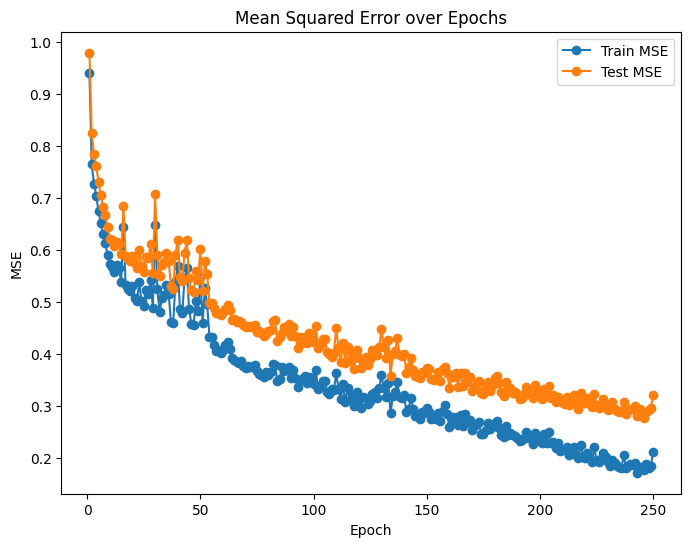

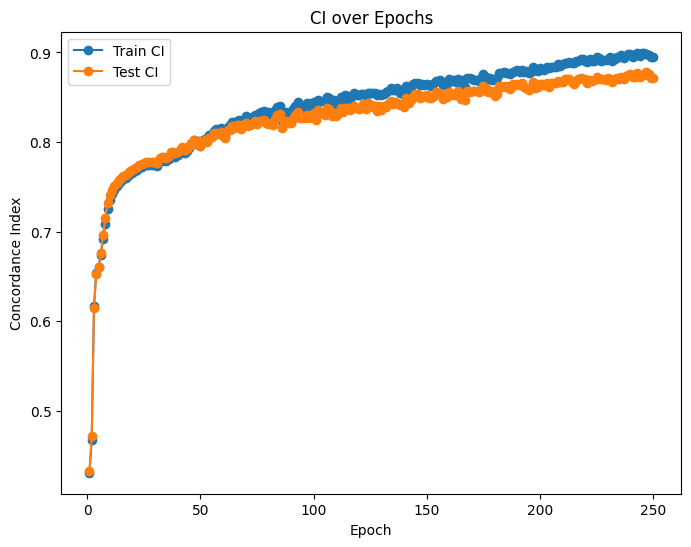

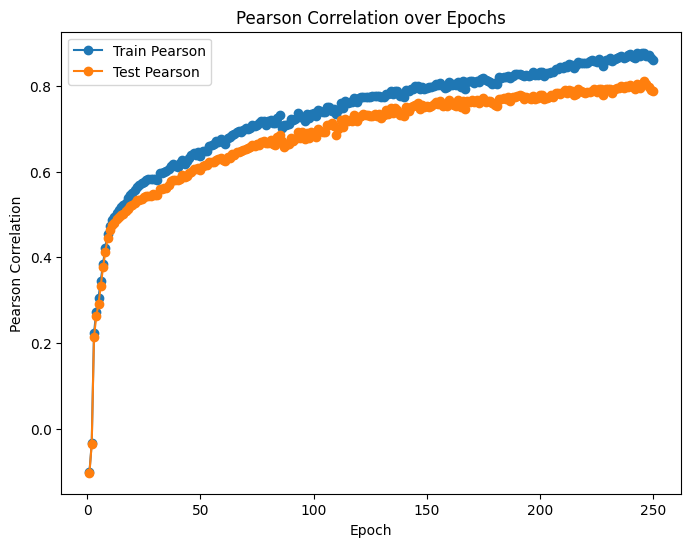

In [3]:
#model Add ! 
import os
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import MSELoss
from torch_geometric.nn import GCNConv, global_mean_pool as gep
from torch_geometric.data import Data, Batch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# Optional, for plotting:
import matplotlib.pyplot as plt

##############################################################################
#                               1. METRICS
##############################################################################

@torch.no_grad()
def ci_vectorized(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Naive O(N^2) Concordance Index using vectorized GPU operations.
    preds, targets: (N,) on the same device (e.g. cuda).
    """
    # (N, N) differences
    p_diff = preds.unsqueeze(1) - preds.unsqueeze(0)
    t_diff = targets.unsqueeze(1) - targets.unsqueeze(0)
    # mask out pairs where targets are identical
    mask = (t_diff != 0)
    # sign of product => +1 (concordant), 0 (tie), -1 (discordant)
    sign_mat = torch.sign(p_diff * t_diff)
    # step function h(x): 1 if x>0, 0.5 if x=0, 0 if x<0
    h = (sign_mat == 1).float() + 0.5 * (sign_mat == 0).float()
    # apply mask
    h_masked = h * mask.float()
    c = h_masked.sum()
    s = mask.sum().float()
    return (c / s).item() if s > 0 else 0.0

@torch.no_grad()
def mse_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    GPU-friendly MSE using torch's built-in mean squared error.
    """
    return F.mse_loss(preds, targets, reduction='mean').item()

@torch.no_grad()
def pearson_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Pearson correlation coefficient in PyTorch (GPU-friendly).
    preds, targets: (N,) on the same device
    """
    p_centered = preds - preds.mean()
    t_centered = targets - targets.mean()
    cov = (p_centered * t_centered).sum()
    denom = torch.sqrt((p_centered**2).sum()) * torch.sqrt((t_centered**2).sum())
    eps = 1e-8
    return (cov / (denom + eps)).item()

##############################################################################
#                       2. GNN MODEL DEFINITION
##############################################################################
class GNNNet(torch.nn.Module):
    def __init__(self, n_output=1, num_features_pro=54, num_features_mol=78, output_dim=128, dropout=0.2):
        super(GNNNet, self).__init__()

        print('GNNNet Loaded')
        self.n_output = n_output
        self.mol_conv1 = GCNConv(num_features_mol, num_features_mol)
        self.mol_conv2 = GCNConv(num_features_mol, num_features_mol * 2)
        self.mol_conv3 = GCNConv(num_features_mol * 2, num_features_mol * 4)
        self.mol_fc_g1 = torch.nn.Linear(num_features_mol * 4, 1024)
        self.mol_fc_g2 = torch.nn.Linear(1024, output_dim)

        # self.pro_conv1 = GCNConv(embed_dim, embed_dim)
        self.pro_conv1 = GCNConv(num_features_pro, num_features_pro)
        self.pro_conv2 = GCNConv(num_features_pro, num_features_pro * 2)
        self.pro_conv3 = GCNConv(num_features_pro * 2, num_features_pro * 4)
        # self.pro_conv4 = GCNConv(embed_dim * 4, embed_dim * 8)
        self.pro_fc_g1 = torch.nn.Linear(num_features_pro * 4, 1024)
        self.pro_fc_g2 = torch.nn.Linear(1024, output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # combined layers
        self.fc1 = nn.Linear(output_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.out = nn.Linear(512, self.n_output)

    def forward(self, data_mol, data_pro):
        # get graph input
        mol_x, mol_edge_index, mol_batch = data_mol.x, data_mol.edge_index, data_mol.batch
        # get protein input
        target_x, target_edge_index, target_batch = data_pro.x, data_pro.edge_index, data_pro.batch

        # target_seq=data_pro.target

        # print('size')
        # print('mol_x', mol_x.size(), 'edge_index', mol_edge_index.size(), 'batch', mol_batch.size())
        # print('target_x', target_x.size(), 'target_edge_index', target_batch.size(), 'batch', target_batch.size())

        x = self.mol_conv1(mol_x, mol_edge_index)
        x = self.relu(x)

        # mol_edge_index, _ = dropout_adj(mol_edge_index, training=self.training)
        x = self.mol_conv2(x, mol_edge_index)
        x = self.relu(x)

        # mol_edge_index, _ = dropout_adj(mol_edge_index, training=self.training)
        x = self.mol_conv3(x, mol_edge_index)
        x = self.relu(x)
        x = gep(x, mol_batch)  # global pooling

        # flatten
        x = self.relu(self.mol_fc_g1(x))
        x = self.dropout(x)
        x = self.mol_fc_g2(x)
        x = self.dropout(x)

        xt = self.pro_conv1(target_x, target_edge_index)
        xt = self.relu(xt)

        # target_edge_index, _ = dropout_adj(target_edge_index, training=self.training)
        xt = self.pro_conv2(xt, target_edge_index)
        xt = self.relu(xt)

        # target_edge_index, _ = dropout_adj(target_edge_index, training=self.training)
        xt = self.pro_conv3(xt, target_edge_index)
        xt = self.relu(xt)

        # xt = self.pro_conv4(xt, target_edge_index)
        # xt = self.relu(xt)
        xt = gep(xt, target_batch)  # global pooling

        # flatten
        xt = self.relu(self.pro_fc_g1(xt))
        xt = self.dropout(xt)
        xt = self.pro_fc_g2(xt)
        xt = self.dropout(xt)

        # print(x.size(), xt.size())
        #  not concat ! multiple applid
        # xc = torch.cat((x, xt), 1)
        xc = x * xt
        # print(xc.size())
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        return out



##############################################################################
#                   3. DATA LOADING HELPERS
##############################################################################

warnings.filterwarnings('ignore', category=FutureWarning)

def load_sample(path):
    """
    Load a .pt sample, fix up 'x' and 'edge_index', return (mol_data, pro_data, target).
    """
    sample = torch.load(path)
    mol_data, pro_data, target = sample[0], sample[1], sample[2]

    # Convert dict to Data if needed
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)

    # Fix x
    if not hasattr(mol_data, 'x') or mol_data.x is None:
        if hasattr(mol_data, 'features'):
            mol_data.x = mol_data.features
            del mol_data.features
        else:
            raise ValueError("mol_data missing 'x' or 'features'")
    if not hasattr(pro_data, 'x') or pro_data.x is None:
        if hasattr(pro_data, 'features'):
            pro_data.x = pro_data.features
            del pro_data.features
        else:
            raise ValueError("pro_data missing 'x' or 'features'")

    mol_data.x = torch.as_tensor(mol_data.x, dtype=torch.float32)
    pro_data.x = torch.as_tensor(pro_data.x, dtype=torch.float32)

    # Fix edge_index
    def fix_edge_index(d):
        if not isinstance(d.edge_index, torch.Tensor):
            d.edge_index = torch.tensor(d.edge_index, dtype=torch.long)
        else:
            d.edge_index = d.edge_index.long()
        if d.edge_index.shape[0] != 2:
            d.edge_index = d.edge_index.t()
        d.num_nodes = d.x.size(0)

    fix_edge_index(mol_data)
    fix_edge_index(pro_data)

    return (mol_data, pro_data, target)

def batch_loader(file_list, sample_dir, batch_size):
    """
    Yields batches of (mol_data, pro_data, target) from file_list.
    """
    batch = []
    for file_name in file_list:
        path = os.path.join(sample_dir, file_name)
        sample = load_sample(path)
        batch.append(sample)
        if len(batch) == batch_size:
            yield batch
            batch = []
    if batch:
        yield batch

##############################################################################
#              4. TRAINING / EVALUATION WITH METRICS EACH EPOCH
##############################################################################

import os
import torch

def train_and_evaluate(sample_dir, num_epochs=10, test_size=0.2, lr=0.001):
    """
    Trains the GNN model, evaluates on train & test each epoch, saves metrics + checkpoints.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Running on {device}.")

    # Gather samples
    sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
    assert len(sample_files) > 0, "No .pt files found in sample_dir!"

    # Split
    train_files, test_files = train_test_split(sample_files, test_size=test_size, random_state=42)

    # Make checkpoint dir
    training_model_dir = os.path.join(os.getcwd(), 'TrainingModelMul')
    os.makedirs(training_model_dir, exist_ok=True)
    print(f"Checkpoints will be saved to: {training_model_dir}")

    metrics_path = os.path.join(training_model_dir, "training_metrics.pt")

    # Load existing metrics if available (Ensures metrics continue from previous runs)
    if os.path.exists(metrics_path):
        saved_metrics = torch.load(metrics_path)
        train_metrics = saved_metrics['train_metrics']
        test_metrics = saved_metrics['test_metrics']
        print("Loaded previous training metrics!")
    else:
        train_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        test_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        print("Starting fresh metrics tracking.")

    # Infer input dims from one sample
    sample0 = load_sample(os.path.join(sample_dir, train_files[0]))
    mol_data0, pro_data0 = sample0[0], sample0[1]
    num_features_mol = mol_data0.x.size(1)
    num_features_pro = pro_data0.x.size(1)

    # Initialize model
    model = GNNNet(num_features_mol=num_features_mol,
                   num_features_pro=num_features_pro).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = MSELoss()

    # Possibly resume from checkpoint
    start_epoch = 1
    existing_checkpoints = [
        f for f in os.listdir(training_model_dir)
        if f.endswith('.pt') and f.startswith('model_epoch')
    ]
    last_ckpt_path = None  # Track previous checkpoint for deletion

    if existing_checkpoints:
        latest_ckpt = max(existing_checkpoints, key=lambda x: int(x.split('_epoch')[1].split('.pt')[0]))
        ckpt_path = os.path.join(training_model_dir, latest_ckpt)
        print(f"Loading checkpoint from {ckpt_path}")
        ckpt = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(ckpt['model_state_dict'])
        optimizer.load_state_dict(ckpt['optimizer_state_dict'])
        loaded_epoch = ckpt['epoch']
        start_epoch = loaded_epoch + 1
        last_ckpt_path = ckpt_path  # Store last checkpoint path for deletion
        print(f"Resuming from epoch {start_epoch}")
    else:
        print("No existing checkpoint found; starting fresh.")

    @torch.no_grad()
    def evaluate(files):
        model.eval()
        all_preds = []
        all_targets = []
        batch_eval_size = 200
        for batch_samples in batch_loader(files, sample_dir, batch_eval_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device)

            out = model(mol_batch, pro_batch).view(-1)
            all_preds.append(out)
            all_targets.append(t_tensor)

        all_preds = torch.cat(all_preds, dim=0)
        all_targets = torch.cat(all_targets, dim=0)

        mse_val = mse_torch(all_preds, all_targets)
        ci_val = ci_vectorized(all_preds, all_targets)
        pearson_val = pearson_torch(all_preds, all_targets)
        return mse_val, ci_val, pearson_val

    # Training loop
    batch_size = 500
    for epoch in tqdm(range(start_epoch, num_epochs + 1), desc="Training", unit="epoch"):
        model.train()
        running_loss = 0.0

        for batch_samples in batch_loader(train_files, sample_dir, batch_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device).view(-1)

            optimizer.zero_grad()
            out = model(mol_batch, pro_batch).view(-1)
            loss = loss_fn(out, t_tensor)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(batch_samples)

        avg_loss = running_loss / len(train_files)
        tqdm.write(f"[Epoch {epoch}/{num_epochs}] Training Loss: {avg_loss:.4f}")

        # Evaluate on train & test
        train_mse, train_ci, train_pearson = evaluate(train_files)
        test_mse, test_ci, test_pearson = evaluate(test_files)

        train_metrics['epoch'].append(epoch)
        train_metrics['mse'].append(train_mse)
        train_metrics['ci'].append(train_ci)
        train_metrics['pearson'].append(train_pearson)

        test_metrics['epoch'].append(epoch)
        test_metrics['mse'].append(test_mse)
        test_metrics['ci'].append(test_ci)
        test_metrics['pearson'].append(test_pearson)

        tqdm.write(f"  Train => MSE={train_mse:.4f}, CI={train_ci:.4f}, Pearson={train_pearson:.4f}")
        tqdm.write(f"  Test  => MSE={test_mse:.4f}, CI={test_ci:.4f}, Pearson={test_pearson:.4f}")

        # Save new checkpoint
        ckpt_name = f"model_epoch{epoch}.pt"
        ckpt_path = os.path.join(training_model_dir, ckpt_name)
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, ckpt_path)
        tqdm.write(f"Checkpoint saved at epoch {epoch}")

        # Delete the previous checkpoint after saving the new one
        if last_ckpt_path and os.path.exists(last_ckpt_path):
            os.remove(last_ckpt_path)
            tqdm.write(f"Deleted previous checkpoint: {last_ckpt_path}")

        # Update last checkpoint path
        last_ckpt_path = ckpt_path

        # Save/Update the metrics after each epoch
        torch.save({
            'train_metrics': train_metrics,
            'test_metrics': test_metrics
        }, metrics_path)

    # Final evaluations
    final_train_mse, final_train_ci, final_train_pearson = evaluate(train_files)
    final_test_mse, final_test_ci, final_test_pearson = evaluate(test_files)
    print(f"\nFinal Train => MSE={final_train_mse:.4f}, CI={final_train_ci:.4f}, Pearson={final_train_pearson:.4f}")
    print(f"Final Test  => MSE={final_test_mse:.4f}, CI={final_test_ci:.4f}, Pearson={final_test_pearson:.4f}")

    # Save final metrics
    torch.save({
        'train_metrics': train_metrics,
        'test_metrics': test_metrics
    }, metrics_path)
    print(f"Metrics saved to {metrics_path}")

    return train_metrics, test_metrics


##############################################################################
#               5. OPTIONAL: PLOT THE SAVED METRICS
##############################################################################

def plot_metrics(checkpoint_dir='TrainingModelMul'):
    """
    Load training_metrics.pt from the checkpoint_dir and plot MSE, CI, Pearson over epochs.
    """
    metrics_path = os.path.join(checkpoint_dir, "training_metrics.pt")
    if not os.path.exists(metrics_path):
        print(f"No metrics file found at {metrics_path}!")
        return

    saved_data = torch.load(metrics_path)
    train_metrics = saved_data['train_metrics']
    test_metrics = saved_data['test_metrics']
    epochs = train_metrics['epoch']

    # Plot MSE
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['mse'], 'o-', label='Train MSE')
    plt.plot(epochs, test_metrics['mse'], 'o-', label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "MSE_plot.png"))  
    plt.show()

    # Plot CI
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['ci'], 'o-', label='Train CI')
    plt.plot(epochs, test_metrics['ci'], 'o-', label='Test CI')
    plt.xlabel('Epoch')
    plt.ylabel('Concordance Index')
    plt.title('CI over Epochs')
    plt.savefig(os.path.join(checkpoint_dir, "CI_plot.png"))  
    plt.legend()
    plt.show()

    # Plot Pearson
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['pearson'], 'o-', label='Train Pearson')
    plt.plot(epochs, test_metrics['pearson'], 'o-', label='Test Pearson')
    plt.xlabel('Epoch')
    plt.ylabel('Pearson Correlation')
    plt.title('Pearson Correlation over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "PEARSON_plot.png"))  
    plt.show()

##############################################################################
#                                 MAIN
##############################################################################

if __name__ == "__main__":
    # Adjust the paths/parameters as needed
    SAMPLE_DIR = "prepared_samples"   # Directory with your .pt samples
    NUM_EPOCHS = 250
    TEST_SPLIT = 0.2
    LR = 0.001

    # 1) Train and evaluate
    train_metrics, test_metrics = train_and_evaluate(
        sample_dir=SAMPLE_DIR,
        num_epochs=NUM_EPOCHS,
        test_size=TEST_SPLIT,
        lr=LR
    )

    # 2) Plot the metrics
    plot_metrics('TrainingModelMul')